#1. Downloading molecule tranches from the ZINC22 Database for virtual screening

ZINC-22 is a free database of commercially-available compounds for virtual screening. ZINC-22 focuses on make-on-demand ("tangible") compounds from a small number of large catalogs: Enamine, WuXi and Mcule. ZINC-22 currently has about 54.9 billion molecules in 2D and 5.9 billion in 3D.

Cartblanche22 is an interface to ZINC-22. We'll be getting out molecules from https://cartblanche22.docking.org/tranches/2d Follow the link, select a tranche/s


A tutorial can be foudn at https://www.youtube.com/watch?v=OE2sBQ61LEg&t=7s

In [1]:
#@title 1) Install modern RDKit + friends (works on Colab Py 3.12)
!pip -q install "rdkit>=2024.9" "numpy>=2.0,<3" pandas pillow ipywidgets matplotlib mols2grid tqdm

# 2) Sanity check
from google.colab import output
output.enable_custom_widget_manager()

import sys, numpy as np, pandas as pd
from rdkit import rdBase, Chem
print("Python:", sys.version.split()[0])
print("NumPy :", np.__version__)
print("RDKit :", getattr(rdBase, "rdkitVersion", "unknown"))
assert Chem.MolFromSmiles("CCO")
print("RDKit import OK ✓")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00
Python: 3.12.11
NumPy : 2.0.2
RDKit : 2025.03.5
RDKit import OK ✓




1.   Select a tranche/s and download using the WGET method.
2.   Open the .CURL file as a text file, copy the https link e.g.  https://files.docking.org/zinc22/vendors_zincid_map/current/H11/H11P170.smi.gz and paste it into your browser.
3. Enter username: gpcr and password: xta if prompted.
4. Upload (right-click) the file ZINC22-downloader-2D-smi.gz into the /content folder in left-hand side bar.

---






In [21]:
#@title Extract the raw ZINC22 library from WGET
# path to the .wget file you uploaded
%%bash
SCRIPT="/content/ZINC22-downloader-2D-smi.gz.wget"
OUT_DIR="/content/zinc22_raw"
sed -i 's/\r$//' "$SCRIPT"
mkdir -p "$OUT_DIR" && cd "$OUT_DIR"
bash "$SCRIPT"

--2025-08-29 18:16:03--  https://files.docking.org/zinc22/vendors_zincid_map/current/H11/H11P170.smi.gz
Resolving files.docking.org (files.docking.org)... 169.230.75.4
Connecting to files.docking.org (files.docking.org)|169.230.75.4|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Restricted Content"
Reusing existing connection to files.docking.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 629050 (614K) [application/x-gzip]
Saving to: ‘H11/H11P170.smi.gz’

     0K .......... .......... .......... .......... ..........  8%  362K 2s
    50K .......... .......... .......... .......... .......... 16%  720K 1s
   100K .......... .......... .......... .......... .......... 24% 15.5M 1s
   150K .......... .......... .......... .......... .......... 32% 78.1M 0s
   200K .......... .......... .......... .......... .......... 40%  758K 0s
   250K .......... .......... .......... .......... .......... 48% 25.5M 0s


In [22]:
#@title Unzip the gzip file
!gzip /content/ZINC22-downloader-2D-smi.gz.wget

In [23]:
#@title Next we'll see how many SMILES are in the library.
%%bash
# Use zcat to decompress and wc -l to count lines
echo "Total number of SMILES in the file:"
zcat /content/zinc22_raw/H11/H11P170.smi.gz | wc -l

Total number of SMILES in the file:
59999


In [24]:
#@title Display a sample of the DataFrame

import pandas as pd
import subprocess
import io # Import the io module

# Run the zcat and head commands and capture the output
process = subprocess.run(
    ['zcat', '/content/zinc22_raw/H11/H11P170.smi.gz'],
    capture_output=True, text=True, check=True
)
output_lines = process.stdout.splitlines()[:50]

# Join the lines back into a single string for pandas to read
output_string = "\n".join(output_lines)

# Read the string into a pandas DataFrame. Assuming whitespace as delimiter.
# The file seems to have at least three columns based on the preview.
# Let's try reading with a regex separator for one or more whitespace characters.
# We'll also name the columns based on the typical SMILES file format.
df = pd.read_csv(
    io.StringIO(output_string),
    sep=r'\s+',
    header=None,
    names=['SMILES', 'ZINC_ID', 'Other_ID'] # Assuming these column names based on format
)


display(df)

SMILES  \
CC(=O)Nc1cccc(F)c1                ZINCbn0000001c9k   
C=C(CO)c1sc(C)nc1C                ZINCbn0000001DGY   
CCC[C@@H](CC)CC(=O)NO             ZINCbn0000001cgw   
CCC[C@H](CC)CC(=O)NO              ZINCbn0000001cgP   
CC[C@H](F)CN1CC[C@@H](F)C1        ZINCbn0000001SVa   
C[C@@H](O)CSCc1ccsn1              ZINCbn0000001SWT   
C[C@H]1CN(CC#CBr)CCS1             ZINCbn0000001SY6   
FCCN[C@H]1C[C@H]2CC[C@H]1C2       ZINCbn0000001cvC   
CC(C)C(=O)Nc1nccs1                ZINCbn0000001ca9   
C[C@H]1C[C@H]1N(C)C(=O)C=CBr      ZINCbn00000065Ro   
COC(=O)C1CC(=C(F)F)C1             ZINCbn0000006ete   
CC(C)NC(=O)C1CCCC1                ZINCbn0000001caL   
c1cc(-c2cocn2)ccn1                ZINCbn0000001T0j   
C=C[C@@H](C)CC(=O)NCCC            ZINCbn0000001c74   
CC(=O)N1[C@H](C)CCC1(C)C          ZINCbn0000004Idf   
CCN[C@H]1C[C@@H]2C[C@H]1C[C@H]2F  ZINCbn0000004HDV   
CC[C@@H](F)CN1CC[C@H](F)C1        ZINCbn0000001SUU   
COC[C@H](C)N(C)CC=CCl             ZINCbn0000001co0   
C=C[C@H](C)OC(=O)[C@H]1C[C@H]1C   ZINCbn0000001c7s   
CNCCc1ccc(C)cc1                   ZINCbn0000002wjg   
C[C@@H](CF)NC[C@H]1CC12CC2        ZINCbn0000005eMz   
CCC(=O)N1CCCC[C@@H]1C             ZINCbn0000001ccD   
FC(F)CNC1CCCSC1                   ZINCbn0000003bNl   
C=CCN1OC2CCC1CC2                  ZINCbn0000001c5Z   
CC(C)S(=O)(=O)C1CCCC1             ZINCbn0000001cb0   
c1n[nH]cc1OC1CCCC1                ZINCbn0000003YJs   
CCC(CC)N[C@@H](C)COC              ZINCbn0000001cdF   
CC1CSCCN1CC#CBr                   ZINCbn0000003sE4   
Cc1ccc(Cl)cc1C(N)=O               ZINCbn0000001DK1   
Cc1ccc(F)c(CN)c1F                 ZINCbn0000002imn   
CC[C@H](C)N(C)C[C@H](C)OC         ZINCbn0000001ckk   
C=C[C@H](C)CC(=O)NCCC             ZINCbn0000001c7g   
CC[C@H](F)CN1CC[C@H](F)C1         ZINCbn0000001SVb   
CNC(=O)CC[C@H]1CC1(Cl)Cl          ZINCbn0000001SVG   
CC(C)CCC(=O)NC1CC1                ZINCbn0000001cak   
CCCCC(=O)N1CCCC1                  ZINCbn0000001cev   
CCCN(C)C(=O)C=CSC                 ZINCbn0000001cfi   
CCCC(=O)N1CCCCC1                  ZINCbn0000001z4Q   
CC1CC(N[C@@H]2C[C@H]2CF)C1        ZINCbn0000001SS6   
C=CCNC(=O)C[C@@H](C)CC            ZINCbn0000001c67   
COC[C@@H](C)N(C)CC=CCl            ZINCbn0000001cnQ   
FCCN[C@@H]1C[C@H]2CC[C@H]1C2      ZINCbn0000001cvy   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   

                                                         ZINC_ID  \
CC(=O)Nc1cccc(F)c1                            s_22__57732__58844   
C=C(CO)c1sc(C)nc1C                  m_271570__15703516__12802774   
CCC[C@@H](CC)CC(=O)NO                    s_527__388132__14261288   
CCC[C@H](CC)CC(=O)NO                     s_527__388132__14261288   
CC[C@H](F)CN1CC[C@@H](F)C1             m_2230__10685064__9787608   
C[C@@H](O)CSCc1ccsn1                                 Z4236437676   
C[C@H]1CN(CC#CBr)CCS1                                Z3772622141   
FCCN[C@H]1C[C@H]2CC[C@H]1C2           s_269862__9706110__7204822   
CC(C)C(=O)Nc1nccs1                         s_527__154077__156044   
C[C@H]1C[C@H]1N(C)C(=O)C=CBr            m_22__16770456__26254490   
COC(=O)C1CC(=C(F)F)C1                   m_1458__25963996__483916   
CC(C)NC(=O)C1CCCC1                WXDL_WXCD00120062SB00004SB0043   
c1cc(-c2cocn2)ccn1                   m_271570__9487570__21743886   
C=C[C@@H](C)CC(=O)NCCC                   m_527__154065__16520646   
CC(=O)N1[C@H](C)CCC1(C)C                   m_22__10890204__58844   
CCN[C@H]1C[C@@H]2C[C@H]1C[C@H]2F                 PV-003496162282   
CC[C@@H](F)CN1CC[C@H](F)C1             m_2230__10685064__9787608   
COC[C@H](C)N(C)CC=CCl                   m_2230__13421084__667198 

* Now let's preview the smiles as 2D chemical structures.

In [25]:
#@title Preview ZINC-22 building blocks (BBs) as 2D chemical structures (handles .smi.tgz, .smi.gz, .smi; recursive)

import io, tarfile, gzip, glob, os, pandas as pd
from rdkit import Chem
import mols2grid
from IPython.display import display

ROOT = "/content/zinc22_raw"   # where you downloaded
N_PREVIEW = 10000               # molecules for the grid

def iter_all_smiles(root):
    """Yield SMILES from any .smi.tgz / .smi.gz / .smi under root (recursive)."""
    # 1) .smi.tgz archives
    for tgz in glob.glob(os.path.join(root, "**", "*.smi.tgz"), recursive=True):
        with tarfile.open(tgz, "r:gz") as tf:
            for m in tf.getmembers():
                if not m.isfile() or not (m.name.endswith(".smi") or m.name.endswith(".smi.gz")):
                    continue
                f = tf.extractfile(m)
                if f is None:
                    continue
                if m.name.endswith(".gz"):
                    f = gzip.GzipFile(fileobj=f)
                for line in io.TextIOWrapper(f, encoding="utf-8", errors="ignore"):
                    line=line.strip()
                    if line and not line.startswith("#"):
                        yield line.split()[0]

    # 2) loose .smi.gz files
    for gz_path in glob.glob(os.path.join(root, "**", "*.smi.gz"), recursive=True):
        with gzip.open(gz_path, "rt", encoding="utf-8", errors="ignore") as f:
            for line in f:
                line=line.strip()
                if line and not line.startswith("#"):
                    yield line.split()[0]

    # 3) loose .smi files
    for smi_path in glob.glob(os.path.join(root, "**", "*.smi"), recursive=True):
        with open(smi_path, "r", encoding="utf-8", errors="ignore") as f:
            for line in f:
                line=line.strip()
                if line and not line.startswith("#"):
                    yield line.split()[0]

# Collect preview molecules
rows = []
for smi in iter_all_smiles(ROOT):
    m = Chem.MolFromSmiles(smi)
    if m:
        rows.append({"mol": m, "smiles": smi})
    if len(rows) >= N_PREVIEW:
        break

if rows:
    df = pd.DataFrame(rows)
    display(mols2grid.display(df, mol_col="mol", smiles_col="smiles",
                              subset=["img","smiles"], use_svg=True, n_cols=6))
    print(f"Previewed {len(df)} molecules. "
          f"Scanned {len(glob.glob(ROOT + '/**/*.smi*', recursive=True))} files under {ROOT}.")
else:
    print("No molecules parsed — check the download folder and file types.")


MolGridWidget()

Previewed 10000 molecules. Scanned 1 files under /content/zinc22_raw.


#2.  Creating new chemical-space: core decoration using chemical intuition

*   What if instead of virtually screening these ZINC22 fragments directly (/content/zinc22_raw/H16/H16P030.smi.gz), we wanted to use them as building blocks to decorate our pyrroldine cores? i.e. HIT expansion.

* Let's remind ourselves of the structures again, as well as our chosen exit vectors and their chemical reactivities:

In [27]:
#@title Genereate grid of SARS-CoV-2 Nsp13-bound fragments (reference smiles).
# --- 0 ▸ imports -------------------------------------------------------------
from rdkit import Chem
from rdkit.Chem import Descriptors, Crippen, Lipinski
import mols2grid, pandas as pd

# --- 1 ▸ your SMILES ----------------------------------------------------------
smiles_list = [
    "OC[C@H]1[C@H](C2=CC(F)=CC=C2)CN(C3=CC(C)=NC=C3C#N)C1",
    "O[C@H]1[C@H](C2=CC=CC=C2)CN(C3=CC(C)=NC=C3C#N)C1",
    "N#CC1=CC(C)=C(CC)N=C1N2C[C@@H](CO)[C@H](C3=CC=CC=C3)C2",
    "N#CC1=CN=CC=C1N2C[C@@H](C(OC)=O)[C@H](C3=CC(F)=CC=C3)C2",
    "OC([C@H]1[C@H](C2=CC=CC=C2)CN(C(C)=O)C1)=O",
    "OC([C@H]1[C@H](C2=CC=CC(OC)=C2)CN(C(C3=NC(N4C=NC=N4)=CC=C3)=O)C1)=O",
    "OC([C@H]1[C@H](C2=CC=CC(OC)=C2)CN(C(C3=CC(OCCO4)=C4C=C3)=O)C1)=O"
]
df = pd.DataFrame({"smiles": smiles_list})

# --- 2 ▸ RDKit Mol column -----------------------------------------------------
# (Having a Mol column makes descriptor calculation and highlighting easier)
df["mol"] = df["smiles"].apply(Chem.MolFromSmiles)

# --- 3 ▸ calculate a few descriptors -----------------------------------------
df["MW"]      = df["mol"].apply(Descriptors.MolWt)      # molecular weight
df["cLogP"]   = df["mol"].apply(Crippen.MolLogP)        # Crippen logP
df["HBA"]     = df["mol"].apply(Lipinski.NumHAcceptors) # H‑bond acceptors
df["HBD"]     = df["mol"].apply(Lipinski.NumHDonors)    # H‑bond donors

# Define your experimental crystallography list.
crystallography_list = [False, False, False, False, True, True, True]
df["XRAY?"] = crystallography_list

# Define your experimental KD values (µM).
#    Make sure the length matches smiles_list!
kd_binding_list = [
    (33, 84),
    (56, 44),
    (14, 36),
    (27, 49),
    (0, 0),
    (0, 0),
    (0, 0),
]
df["KD"] = [t[0] for t in kd_binding_list]
df["binding_pct"] = [t[1] for t in kd_binding_list]

# --- 4a ▸ HIGHLIGHT OPTION A – one SMARTS for every molecule ------------------
# (mols2grid will match it individually per molecule at render time)
ring_smarts = "c1ccccc1"          # highlight all benzene rings
df["highlight_smarts"] = ring_smarts

# --- 4b ▸ HIGHLIGHT OPTION B – explicit atom lists per molecule --------------
# Here we pre‑compute the ring atom IDs ourselves.
pattern = Chem.MolFromSmarts(ring_smarts)
def ring_atoms(m):
    match = m.GetSubstructMatch(pattern)
    return list(match) if match else []                 # empty list = no highlight
df["highlight_atoms"] = df["mol"].apply(ring_atoms)

# --- 5 ▸ show the grid --------------------------------------------------------
grid = mols2grid.display(
    df,
    smiles_col="smiles",
    subset=["img", "XRAY?", "KD", "MW", "cLogP", "HBA", "HBD"],
    # change the value that is written to the cell
    transform={
        "XRAY?": lambda v: "XRAY? yes" if v else "XRAY? no",
        "KD"   : lambda x: f"KD {x:.2f} µM, {int(x)}% binding",
        "MW"   : lambda x: f"MW {round(x,1)}",
        "cLogP": lambda x: f"logP {x:.2f}",
        "HBA"  : lambda x: f"HBA {x}",
        "HBD"  : lambda x: f"HBD {x}",
    },
    use_svg=True,
)
grid


MolGridWidget()

*  All hits contain a chiral pyrrolidine core with variours R-groups pertruding from three main exit vectors.

*  Let's draw a core that could theoretically be used to make these molecules in 2-steps using simple chemical reactions (e.g. N-coupling reactions, or halogen SN2 displacement - remember the aim here is synthetic accessibility, as well as chemical diversity!)



In [28]:
#@title Genereate grid of your own cores from SMILES
#@markdown **Input SMILES:** You can provide SMILES strings either by uploading `.smi` files or by pasting them directly into the text box below.

# --- Input UI ---
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, clear_output
import io
import pandas as pd # Import pandas here

upload_button = widgets.Button(description="Upload .smi files")
file_upload_output = widgets.Output()

smiles_textarea = widgets.Textarea(
    value='',
    placeholder='Paste SMILES strings here (one per line)',
    description='Paste SMILES:',
    disabled=False,
    layout=widgets.Layout(width='80%', height='150px')
)

input_choice = widgets.ToggleButtons(
    options=['Paste SMILES', 'Upload .smi files'],
    description='Input method:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Paste SMILES directly', 'Upload one or more .smi files'],
#     icons=['pencil', 'file_upload']
)

generate_button = widgets.Button(description="Generate Grid")
grid_output = widgets.Output()

# Global variable to store uploaded file content
uploaded_files_content = None

def on_upload_button_clicked(b):
    with file_upload_output:
        clear_output()
        print("Uploading files...")
        uploaded = files.upload()
        if uploaded:
            print("Files uploaded successfully. Click 'Generate Grid' to process.")
            # Store uploaded file content for later processing
            global uploaded_files_content
            uploaded_files_content = uploaded
        else:
            print("No files uploaded.")

upload_button.on_click(on_upload_button_clicked)


# --- 0 ▸ imports -------------------------------------------------------------
from rdkit import Chem
from rdkit.Chem import Descriptors, Crippen, Lipinski, rdMolDescriptors
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.rdmolops import SanitizeMol, SanitizeFlags
import mols2grid
from IPython.display import display # Redundant, already imported above

# --- Processing Logic (moved into a function triggered by the button) ---
def generate_grid_from_input(b):
    with grid_output:
        clear_output()
        smiles_list = [] # Initialize smiles_list as an empty list

        # Check the selected input method and read SMILES accordingly
        if input_choice.value == 'Paste SMILES':
            smiles_text = smiles_textarea.value.strip()
            if smiles_text:
                smiles_list = [line.strip() for line in smiles_text.splitlines() if line.strip()]
            else:
                print("No SMILES pasted in the text area.")
        elif input_choice.value == 'Upload .smi files':
            global uploaded_files_content
            if uploaded_files_content:
                for filename, content in uploaded_files_content.items():
                    print(f"Processing file: {filename}")
                    # Assuming .smi files have one SMILES per line, potentially followed by an ID
                    # Need to decode bytes content
                    content_string = content.decode('utf-8')
                    for line in content_string.splitlines():
                        line = line.strip()
                        if line and not line.startswith('#'): # Ignore empty lines and comments
                            # Assuming first column is SMILES, split by whitespace
                            parts = line.split(maxsplit=1)
                            if parts:
                                smiles_list.append(parts[0])
                if not smiles_list:
                     print("No valid SMILES found in the uploaded files.")
            else:
                print("No files were uploaded or selected.")

        if not smiles_list:
            print("No SMILES provided. Please paste SMILES or upload files and click 'Generate Grid'.")
            uploaded_files_content = None # Clear uploaded content if no smiles found
            return # Stop processing if no smiles

        print(f"Read {len(smiles_list)} SMILES strings.")
        # Initialize DataFrame with the collected smiles_list
        df = pd.DataFrame({"smiles": smiles_list})


        # --- 2 ▸ RDKit Mol column -----------------------------------------------------
        # (Having a Mol column makes descriptor calculation and highlighting easier)
        # Filter out invalid SMILES before creating Mol objects
        df["mol"] = df["smiles"].apply(Chem.MolFromSmiles)
        df = df[df["mol"].notna()].reset_index(drop=True)

        if df.empty:
            print("No valid molecules could be created from the provided SMILES.")
            uploaded_files_content = None # Clear uploaded content if no valid molecules
            return # Stop processing if no valid molecules
        else:
            print(f"Successfully created molecules for {len(df)} valid SMILES.")

            # --- 3 ▸ calculate a few descriptors -----------------------------------------
            # These calculations will run only if the df is populated with smiles

            df["MW"]      = df["mol"].apply(Descriptors.MolWt)      # molecular weight
            df["cLogP"]   = df["mol"].apply(Crippen.MolLogP)        # Crippen logP
            df["HBA"]     = df["mol"].apply(Lipinski.NumHAcceptors) # H‑bond acceptors
            df["HBD"]     = df["mol"].apply(Lipinski.NumHDonors)    # H‑bond donors

            # Define your experimental crystallography list.
            # This part needs to be revised as we won't have this info from arbitrary input
            # crystallography_list = [False, False, False, False, True, True, True]
            # df["XRAY?"] = crystallography_list

            # Define your experimental KD values (µM).
            # This part also needs to be revised for arbitrary input
            # kd_binding_list = [
            #     (33, 84),
            #     (56, 44),
            #     (14, 36),
            #     (27, 49),
            #     (0, 0),
            #     (0, 0),
            #     (0, 0),
            # ]
            # df["KD"] = [t[0] for t in kd_binding_list]
            # df["binding_pct"] = [t[1] for t in kd_binding_list]

            # --- 4a ▸ HIGHLIGHT OPTION A – one SMARTS for every molecule ------------------
            # (mols2grid will match it individually per molecule at render time)
            # This part will also be less relevant for arbitrary input
            # ring_smarts = "c1ccccc1"          # highlight all benzene rings
            # df["highlight_smarts"] = ring_smarts

            # --- 4b ▸ HIGHLIGHT OPTION B – explicit atom lists per molecule --------------
            # Here we pre‑compute the ring atom IDs ourselves.
            # This part will also be less relevant for arbitrary input
            # pattern = Chem.MolFromSmarts(ring_smarts)
            # def ring_atoms(m):
            #     match = m.GetSubstructMatch(pattern)
            #     return list(match) if match else []                 # empty list = no highlight
            # df["highlight_atoms"] = df["mol"].apply(ring_atoms)

            # --- 5 ▸ show the grid --------------------------------------------------------
            # The display logic is now here, after processing input and creating molecules

            grid = mols2grid.display(
                df,
                smiles_col="smiles",
                mol_col="mol", # Use the mol column for drawing
                subset=["img", "MW", "cLogP", "HBA", "HBD", "smiles"], # Include basic descriptors and smiles
                # change the value that is written to the cell
                transform={
                    "MW"   : lambda x: f"MW {round(x,1)}",
                    "cLogP": lambda x: f"logP {x:.2f}",
                    "HBA"  : lambda x: f"HBA {x}",
                    "HBD"  : lambda x: f"HBD {x}",
                },
                use_svg=True, # Use SVG for better quality
                n_cols=4 # Adjust number of columns as needed
            )
            display(grid)
            uploaded_files_content = None # Clear uploaded content after successful processing


generate_button.on_click(generate_grid_from_input)

# Display all the UI elements and output areas at the end
display(input_choice)
display(smiles_textarea, upload_button, file_upload_output)
display(generate_button, grid_output)

ToggleButtons(description='Input method:', options=('Paste SMILES', 'Upload .smi files'), tooltips=('Paste SMI…

Textarea(value='', description='Paste SMILES:', layout=Layout(height='150px', width='80%'), placeholder='Paste…

Button(description='Upload .smi files', style=ButtonStyle())

Output()

Button(description='Generate Grid', style=ButtonStyle())

Output()

* or draw your own core using the built in skethcer:

In [ ]:
#@title Colab: 2D molecule sketcher + "Save 2D structure as SMILES"
from IPython.display import HTML, display
#Javascript
html = r"""
<div id="mol-sketcher-root" style="font-family:system-ui,-apple-system,Segoe UI,Roboto,Inter,Helvetica,Arial,sans-serif; line-height:1.35;">
  <h3 style="margin:0 0 8px;">2D Molecular Sketcher</h3>
  <div id="status" style="font-size:12px;color:#666;margin:0 0 8px;">Loading editor…</div>

  <!-- Editor goes here -->
  <div id="jsme_container" style="width:720px;height:480px;border:1px solid #e3e3e3;border-radius:8px;overflow:hidden;"></div>

  <div style="margin-top:10px; display:flex; gap:8px; align-items:center; flex-wrap:wrap;">
    <button id="saveBtn" style="padding:8px 12px;border:1px solid #ccc;border-radius:8px;background:#fafafa;cursor:pointer;">
      Save 2D structure as SMILES
    </button>
    <span id="savedBadge" style="display:none;font-size:12px;color:#2e7d32;">Saved ✓</span>
  </div>

  <div style="margin-top:10px;">
    <div style="font-size:12px;color:#444;margin-bottom:4px;">SMILES</div>
    <pre id="smiles_output" style="min-height:1.6em;padding:8px;border:1px dashed #d0d0d0;border-radius:8px;background:#fcfcfc;white-space:pre-wrap;word-break:break-word;margin:0;"></pre>
  </div>
</div>

<script>
// -------------- Configuration (optional) ----------------
// You can pre-load a structure by putting a SMILES here, e.g. "CC(=O)Oc1ccccc1C(=O)O"
const INITIAL_SMILES = "";

// -------------- JSME loader with fallback CDNs ----------
(function() {
  // Define jsmeOnLoad **before** loading the script — JSME will call this automatically.
  window.jsmeOnLoad = function() {
    const status = document.getElementById('status');
    try {
      // Make editor width responsive-ish based on the output area.
      const hostWidth = Math.max(520, Math.min(860, document.getElementById('mol-sketcher-root').clientWidth || 720));
      const widthPx  = hostWidth + "px";
      const heightPx = "480px";

      // Options: stereo & auto E/Z, show implicit H on heteroatoms, allow zoom, modern UI.
      const opts = { "options": "newlook,stereo,autoez,hydrogens,zoom" };

      // Create the editor
      window.jsmeApplet = new JSApplet.JSME("jsme_container", widthPx, heightPx, opts);

      // Optionally load an initial molecule
      if (INITIAL_SMILES && typeof INITIAL_SMILES === "string") {
        try { window.jsmeApplet.readGenericMolecularInput(INITIAL_SMILES); } catch(e) {}
      }

      // Wire up the Save button
      const saveBtn = document.getElementById("saveBtn");
      const out = document.getElementById("smiles_output");
      const badge = document.getElementById("savedBadge");

      saveBtn.addEventListener("click", () => {
        try {
          const smiles = window.jsmeApplet.smiles() || "";
          out.textContent = smiles;
          // Tiny “saved” tick feedback
          badge.style.display = "inline";
          setTimeout(() => { badge.style.display = "none"; }, 1200);
        } catch(err) {
          out.textContent = "[Error reading SMILES: " + (err && err.message ? err.message : err) + "]";
        }
      });

      status.textContent = "Editor ready. Draw your molecule, then click “Save 2D structure as SMILES”.";
      status.style.color = "#2e7d32";
    } catch (e) {
      status.textContent = "Editor failed to initialize: " + e;
      status.style.color = "#b00020";
    }
  };

  // Load JSME from a stable source, with two fallbacks.
  const sources = [
    "https://jsme-editor.github.io/dist/jsme/jsme.nocache.js",
    "https://cdn.jsdelivr.net/npm/jsme-editor@2024.4.29/dist/jsme/jsme.nocache.js",
    "https://unpkg.com/jsme-editor@2024.4.29/dist/jsme/jsme.nocache.js"
  ];
  const status = document.getElementById('status');

  function loadScript(i) {
    if (i >= sources.length) {
      status.textContent = "Could not load the JSME script from any source.";
      status.style.color = "#b00020";
      return;
    }
    const s = document.createElement("script");
    s.type = "text/javascript";
    s.src = sources[i];
    s.onload = function() { /* JSME will call window.jsmeOnLoad() on its own. */ };
    s.onerror = function() { loadScript(i + 1); };
    document.head.appendChild(s);
    status.textContent = "Loading editor… (" + sources[i] + ")";
  }
  loadScript(0);
})();
</script>
"""

display(HTML(html))


* Now, lets at atom indices and chirality labels to the molecules so that we can easily define the exit vectors for our analog generator.

In [30]:
#@title SMILES → PNG (2D + indices + stereo) with a pastel round "puff" over the selected atom (no squares)
#@markdown Paste a SMILES, click **Generate PNG**, pick any atom (e.g. `2: O`) and click again.

import os
import ipywidgets as W
from IPython.display import display, Image, HTML

from rdkit import Chem, RDLogger
from rdkit.Chem import AllChem
try:
    from rdkit.Chem import rdMolDraw2D as rdmoldraw2d
except Exception:
    from rdkit.Chem.Draw import rdMolDraw2D as rdmoldraw2d  # fallback

RDLogger.DisableLog("rdApp.*")

def draw_smiles_with_atom_puff(
    smiles: str,
    out_path: str = "molecule.png",
    width: int = 380,
    height: int = 380,
    annotate_indices: bool = True,
    annotate_stereo: bool = True,
    highlight_atom: int | None = None,
    # pastel puff look (tweak here if you want)
    pastel_rgb=(1.0, 0.45, 0.50),  # soft red/pink (0..1 floats)
    pastel_alpha=0.45,             # transparency (0..1)
    puff_radius=0.30            # 0.5–0.75 is a good range
):
    """Draw molecule to PNG (or SVG) with a pastel, circular 'puff' on one atom using RDKit's highlight."""
    m = Chem.MolFromSmiles(smiles)
    if m is None:
        raise ValueError("Invalid SMILES.")
    Chem.AssignStereochemistry(m, cleanIt=True, force=True, flagPossibleStereoCenters=True)
    AllChem.Compute2DCoords(m)

    use_cairo = hasattr(rdmoldraw2d, "MolDraw2DCairo")
    drawer = rdmoldraw2d.MolDraw2DCairo(int(width), int(height)) if use_cairo else rdmoldraw2d.MolDraw2DSVG(int(width), int(height))
    opts = drawer.drawOptions()
    opts.addAtomIndices = annotate_indices
    opts.addStereoAnnotation = annotate_stereo
    if hasattr(opts, "clearBackground"): opts.clearBackground = False
    if hasattr(opts, "explicitMethyl"):  opts.explicitMethyl  = True
    if hasattr(opts, "bondLineWidth"):   opts.bondLineWidth   = 2
    # Important for round, filled, pastel puffs
    if hasattr(opts, "atomHighlightsAreCircles"): opts.atomHighlightsAreCircles = True
    if hasattr(opts, "fillHighlights"):           opts.fillHighlights = True

    highlightAtoms, highlightAtomColors, highlightAtomRadii = [], {}, {}
    if highlight_atom is not None:
        idx = int(highlight_atom)
        _ = m.GetAtomWithIdx(idx)  # validate
        highlightAtoms = [idx]
        # RDKit colour with alpha (fallback if alpha unsupported)
        try:
            col = rdmoldraw2d.DrawColour(pastel_rgb[0], pastel_rgb[1], pastel_rgb[2], float(pastel_alpha))
        except Exception:
            col = pastel_rgb  # some builds ignore alpha; still pastel
        highlightAtomColors[idx] = col
        highlightAtomRadii[idx]  = float(puff_radius)

    # Draw with highlight
    try:
        rdmoldraw2d.PrepareAndDrawMolecule(
            drawer, m,
            highlightAtoms=highlightAtoms or None,
            highlightAtomColors=highlightAtomColors or None,
            highlightAtomRadii=highlightAtomRadii or None,
        )
    except TypeError:
        # Older RDKit: no radii, still fine
        rdmoldraw2d.PrepareAndDrawMolecule(
            drawer, m,
            highlightAtoms=highlightAtoms or None,
            highlightAtomColors=highlightAtomColors or None,
        )

    drawer.FinishDrawing()

    if use_cairo:
        with open(out_path, "wb") as f:
            f.write(drawer.GetDrawingText())
        return out_path
    else:
        # SVG fallback (still round/filled; may ignore alpha on some builds)
        svg_path = os.path.splitext(out_path)[0] + ".svg"
        with open(svg_path, "wt", encoding="utf-8") as f:
            f.write(drawer.GetDrawingText())
        return svg_path

# ---------------- UI ----------------
smiles_w   = W.Text(value="paste SMILES here, then press 'Generate PNG'", description="SMILES:", layout=W.Layout(width="880px"))
gen_btn    = W.Button(description="Generate PNG", button_style='')
atom_dd    = W.Dropdown(options=[], description="Atom:", layout=W.Layout(width="260px"))
w_w        = W.IntText(value=380, description="W:", layout=W.Layout(width="120px"))
h_w        = W.IntText(value=380, description="H:", layout=W.Layout(width="120px"))
idx_chk    = W.Checkbox(value=True, description="atom indices")
stereo_chk = W.Checkbox(value=True, description="stereo labels")
outname_w  = W.Text(value="molecule.png", description="Save as:", layout=W.Layout(width="360px"))
img_out    = W.Output()
msg_out    = W.Output()

_last_smiles = {"val": None}

def _populate_atoms(smi: str, keep_idx=None):
    m = Chem.MolFromSmiles(smi)
    if m is None:
        atom_dd.options = []; atom_dd.value = None; return
    opts = [(f"{i}: {a.GetSymbol()}", i) for i,a in enumerate(m.GetAtoms())]
    atom_dd.options = opts
    if keep_idx in [v for _,v in opts]:
        atom_dd.value = keep_idx
        return
    # default: first N if present, else first atom
    choice = next((i for i,a in enumerate(m.GetAtoms()) if a.GetSymbol()=="N"), None)
    atom_dd.value = choice if choice is not None else (opts[0][1] if opts else None)

def _render():
    img_out.clear_output(); msg_out.clear_output()
    smi = smiles_w.value.strip()
    if not smi:
        with msg_out: print("Enter a SMILES."); return
    sel = atom_dd.value
    try:
        path = draw_smiles_with_atom_puff(
            smi,
            out_path=outname_w.value.strip() or "molecule.png",
            width=int(w_w.value), height=int(h_w.value),
            annotate_indices=bool(idx_chk.value),
            annotate_stereo=bool(stereo_chk.value),
            highlight_atom=int(sel) if sel is not None else None,
            pastel_rgb=(1.0, 0.45, 0.50),  # soft pinkish red
            pastel_alpha=0.45,             # semi-transparent
            puff_radius=0.30               # small, like your reference
        )
        with img_out:
            if path.lower().endswith(".png"):
                display(Image(filename=path))
            else:
                from IPython.display import SVG
                display(SVG(filename=path))
            display(HTML(f'<div style="font-family:system-ui">Saved: <code>{path}</code> • '
                         f'<a href="{path}" download>Download</a></div>'))
    except Exception as e:
        with msg_out: print(f"Error: {e}")

def on_generate(_):
    smi = smiles_w.value.strip()
    if smi != _last_smiles["val"] or not atom_dd.options:
        _populate_atoms(smi, keep_idx=atom_dd.value)
        _last_smiles["val"] = smi
    _render()

gen_btn.on_click(on_generate)

row = W.HBox([gen_btn, atom_dd, w_w, h_w, idx_chk, stereo_chk])
display(smiles_w, row, outname_w, img_out, msg_out)

# initial dropdown
_populate_atoms(smiles_w.value)
_last_smiles["val"] = smiles_w.value


Text(value="paste SMILES here, then press 'Generate PNG'", description='SMILES:', layout=Layout(width='880px')…

Text(value='molecule.png', description='Save as:', layout=Layout(width='360px'))

Output()

Output()

* Great, now we can see that our exit vectors (chemical reaction centers) is  N5 in the pyrrolidne core.

* If you decide which chemistry you want at each exit (e.g., grow at exit-N5 using N as a nucleophile) you can use RDKit reaction SMARTS + a enumerator that takes your core(s) and the ZINC22 database sets and produces only synthetically sensible products.

* ### The first step is to data mine our ZINC22 library and split it into **1-step chemistry reaction classes**:

1. **Electrophiles:**
acids (as amide precursors), acyl/sulfonyl chlorides or fluorides, chloroformates, isocyanates, primary alkyl halides/mesylates/tosylates, allylic/benzylic halides.

2. **Nucleophiles:**
aliphatic alcohols, phenols, primary/secondary (non-amide) amines, thiols.

3. **Buchwald-Hartwig coupling reagents:**
aryl halides or triflates

4. **SNAr reagents:**
 aryl fluoride, aryl diazonium

5. **Chan-Lam reagents:**
boronic acids, stannanes or siloxanes


These reactions can be altered and/or expanded, depending on your chemistry of choice. For now, we are focusing on the N5 exit vector, so we will stick to possible reactions of secondary amines.




#3. ZINC-22 smi.gz File Scanner: Classifying Building Blocks by their Functional Groups (FGs)

* Below is a Colab-ready scanner that goes through your downloaded ZINC-22.smi.gz input folder and writes them as Building Block (BB) sets .

* It previews a small sample with mols2grid.

* Running this on the ZINC22 database fragment like library subset `H16P030.smi` containing 2'227'908 SMILES strings takes ~28 minutes.





In [40]:
#@title Read .smi.gz as DataFrame and display head
import pandas as pd
import gzip
import io

file_path = '/content/zinc22_raw/H11/H11P170.smi.gz'

try:
    # Open the gzipped file and read the content
    with gzip.open(file_path, 'rt', encoding='utf-8', errors='ignore') as f:
        # Read the first 50 lines
        lines = [next(f) for _ in range(50)]

    # Join the lines back into a single string for pandas to read
    data = "\n".join(lines)

    # Read the string into a pandas DataFrame. Assuming whitespace as delimiter.
    # The file seems to have at least three columns based on the preview.
    # Let's try reading with a regex separator for one or more whitespace characters.
    # We'll also name the columns based on the typical SMILES file format.
    df = pd.read_csv(
        io.StringIO(data),
        sep=r'\s+',
        header=None,
        names=['SMILES', 'ZINC_ID', 'Other_ID'] # Assuming these column names based on format
    )

    # Display the DataFrame
    display(df)

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

SMILES  \
CC(=O)Nc1cccc(F)c1                ZINCbn0000001c9k   
C=C(CO)c1sc(C)nc1C                ZINCbn0000001DGY   
CCC[C@@H](CC)CC(=O)NO             ZINCbn0000001cgw   
CCC[C@H](CC)CC(=O)NO              ZINCbn0000001cgP   
CC[C@H](F)CN1CC[C@@H](F)C1        ZINCbn0000001SVa   
C[C@@H](O)CSCc1ccsn1              ZINCbn0000001SWT   
C[C@H]1CN(CC#CBr)CCS1             ZINCbn0000001SY6   
FCCN[C@H]1C[C@H]2CC[C@H]1C2       ZINCbn0000001cvC   
CC(C)C(=O)Nc1nccs1                ZINCbn0000001ca9   
C[C@H]1C[C@H]1N(C)C(=O)C=CBr      ZINCbn00000065Ro   
COC(=O)C1CC(=C(F)F)C1             ZINCbn0000006ete   
CC(C)NC(=O)C1CCCC1                ZINCbn0000001caL   
c1cc(-c2cocn2)ccn1                ZINCbn0000001T0j   
C=C[C@@H](C)CC(=O)NCCC            ZINCbn0000001c74   
CC(=O)N1[C@H](C)CCC1(C)C          ZINCbn0000004Idf   
CCN[C@H]1C[C@@H]2C[C@H]1C[C@H]2F  ZINCbn0000004HDV   
CC[C@@H](F)CN1CC[C@H](F)C1        ZINCbn0000001SUU   
COC[C@H](C)N(C)CC=CCl             ZINCbn0000001co0   
C=C[C@H](C)OC(=O)[C@H]1C[C@H]1C   ZINCbn0000001c7s   
CNCCc1ccc(C)cc1                   ZINCbn0000002wjg   
C[C@@H](CF)NC[C@H]1CC12CC2        ZINCbn0000005eMz   
CCC(=O)N1CCCC[C@@H]1C             ZINCbn0000001ccD   
FC(F)CNC1CCCSC1                   ZINCbn0000003bNl   
C=CCN1OC2CCC1CC2                  ZINCbn0000001c5Z   
CC(C)S(=O)(=O)C1CCCC1             ZINCbn0000001cb0   
c1n[nH]cc1OC1CCCC1                ZINCbn0000003YJs   
CCC(CC)N[C@@H](C)COC              ZINCbn0000001cdF   
CC1CSCCN1CC#CBr                   ZINCbn0000003sE4   
Cc1ccc(Cl)cc1C(N)=O               ZINCbn0000001DK1   
Cc1ccc(F)c(CN)c1F                 ZINCbn0000002imn   
CC[C@H](C)N(C)C[C@H](C)OC         ZINCbn0000001ckk   
C=C[C@H](C)CC(=O)NCCC             ZINCbn0000001c7g   
CC[C@H](F)CN1CC[C@H](F)C1         ZINCbn0000001SVb   
CNC(=O)CC[C@H]1CC1(Cl)Cl          ZINCbn0000001SVG   
CC(C)CCC(=O)NC1CC1                ZINCbn0000001cak   
CCCCC(=O)N1CCCC1                  ZINCbn0000001cev   
CCCN(C)C(=O)C=CSC                 ZINCbn0000001cfi   
CCCC(=O)N1CCCCC1                  ZINCbn0000001z4Q   
CC1CC(N[C@@H]2C[C@H]2CF)C1        ZINCbn0000001SS6   
C=CCNC(=O)C[C@@H](C)CC            ZINCbn0000001c67   
COC[C@@H](C)N(C)CC=CCl            ZINCbn0000001cnQ   
FCCN[C@@H]1C[C@H]2CC[C@H]1C2      ZINCbn0000001cvy   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   
CC(=O)N1[C@@H](C)CCC[C@H]1C       ZINCbn0000001c8L   

                                                         ZINC_ID  \
CC(=O)Nc1cccc(F)c1                            s_22__57732__58844   
C=C(CO)c1sc(C)nc1C                  m_271570__15703516__12802774   
CCC[C@@H](CC)CC(=O)NO                    s_527__388132__14261288   
CCC[C@H](CC)CC(=O)NO                     s_527__388132__14261288   
CC[C@H](F)CN1CC[C@@H](F)C1             m_2230__10685064__9787608   
C[C@@H](O)CSCc1ccsn1                                 Z4236437676   
C[C@H]1CN(CC#CBr)CCS1                                Z3772622141   
FCCN[C@H]1C[C@H]2CC[C@H]1C2           s_269862__9706110__7204822   
CC(C)C(=O)Nc1nccs1                         s_527__154077__156044   
C[C@H]1C[C@H]1N(C)C(=O)C=CBr            m_22__16770456__26254490   
COC(=O)C1CC(=C(F)F)C1                   m_1458__25963996__483916   
CC(C)NC(=O)C1CCCC1                WXDL_WXCD00120062SB00004SB0043   
c1cc(-c2cocn2)ccn1                   m_271570__9487570__21743886   
C=C[C@@H](C)CC(=O)NCCC                   m_527__154065__16520646   
CC(=O)N1[C@H](C)CCC1(C)C                   m_22__10890204__58844   
CCN[C@H]1C[C@@H]2C[C@H]1C[C@H]2F                 PV-003496162282   
CC[C@@H](F)CN1CC[C@H](F)C1             m_2230__10685064__9787608   
COC[C@H](C)N(C)CC=CCl                   m_2230__13421084__667198 

In [41]:
# @title ZINC22 smi.gz file scanner → .smi outputs (category selector + fast start + LIVE progress + PARALLEL)
# Colab-ready; safe to run multiple times.

# Optional: ensure deps on a fresh runtime
# !pip -q install rdkit-pypi ipywidgets tqdm
# from google.colab import output; output.enable_custom_widget_manager()

# --- User params ---
input_globs = "/content/zinc22_raw/H11/H11P170.smi.gz"  #@param {type:"string"}
max_files   = 50                                        #@param {type:"integer"}
preview_n   = 50                                        #@param {type:"integer"}
dedupe      = True                                      #@param {type:"boolean"}

import os, io, gzip, glob, sys, re, collections
from typing import Iterable, Tuple, List, Dict
from IPython.display import display, clear_output
from tqdm.auto import tqdm

try:
    import ipywidgets as W
    HAS_UI = True
except Exception:
    HAS_UI = False

try:
    RDLogger.DisableLog("rdApp.*")
except Exception:
    pass

EXIT5_ATOM_INDEX = 5
EXIT7_ATOM_INDEX = 7

# ---------- SMARTS (expanded) ----------
ELECTROPHILE_SMARTS = {
    "carboxylic_acid": r"[CX3](=O)[OX2H1]",
    "acyl_halide": r"[CX3](=O)[F,Cl,Br,I]",
    "sulfonyl_halide": r"[#16X4](=O)(=O)[F,Cl,Br,I]",
    "chloro_or_fluoro_formate": r"[OX2][CX3](=O)[F,Cl]",
    "isocyanate": r"[NX2]=C=O",
    "alkyl_sulfonate": r"[CH2,CH3][OX2][#16X4](=O)(=O)[#6]",
    "primary_alkyl_halide": r"[CH2,CH3][Cl,Br,I]",
    "allylic_halide": r"[Cl,Br,I][CH2][CX3]=[CX3]",
    "benzylic_halide": r"[Cl,Br,I][CH2]c",
}
NUCLEOPHILE_SMARTS_BASE = {
    "aliphatic_alcohol": r"[OX2H][CX4;!$(C=*)]",
    "phenol": r"[OX2H]c",
    "thiol": r"[SX2H]",
    "amine_H": r"[NX3;H2,H1]",
}
BUCHWALD_SMARTS = { "aryl_triflate": r"cO[#16X4](=O)(=O)C(F)(F)F" }
SNAR_SMARTS     = { "aryl_diazonium": r"c[N+]#N" }
CHAN_LAM_SMARTS = { "boronic_acid": r"[#6]-[B]([OX2H])[OX2H]" }

ELECTROPHILE_QMOLS     = {k: Chem.MolFromSmarts(v) for k, v in ELECTROPHILE_SMARTS.items()}
NUCLEOPHILE_QMOLS_BASE = {k: Chem.MolFromSmarts(v) for k, v in NUCLEOPHILE_SMARTS_BASE.items()}
BUCHWALD_QMOLS         = {k: Chem.MolFromSmarts(v) for k, v in BUCHWALD_SMARTS.items()}
SNAR_QMOLS             = {k: Chem.MolFromSmarts(v) for k, v in SNAR_SMARTS.items()}
CHAN_LAM_QMOLS         = {k: Chem.MolFromSmarts(v) for k, v in CHAN_LAM_SMARTS.items()}

# ---------- Structural helpers ----------
def is_amide_like_N(mol: Chem.Mol, n_idx: int) -> bool:
    n = mol.GetAtomWithIdx(n_idx)
    for nb in n.GetNeighbors():
        sym = nb.GetSymbol()
        if sym == "C":
            for b in nb.GetBonds():
                if b.GetBondType() == rdchem.BondType.DOUBLE and b.GetOtherAtom(nb).GetSymbol() in ("O","S"):
                    return True
        if sym == "S":
            dbO = sum(1 for b in nb.GetBonds()
                      if b.GetBondType() == rdchem.BondType.DOUBLE and b.GetOtherAtom(nb).GetSymbol()=="O")
            if dbO >= 2:
                return True
    return False

def has_primary_alkyl_halide(mol: Chem.Mol) -> bool:
    for x in (a for a in mol.GetAtoms() if a.GetSymbol() in ("Cl","Br","I")):
        for c in x.GetNeighbors():
            if c.GetAtomicNum()==6 and c.GetHybridization()==rdchem.HybridizationType.SP3 and c.GetTotalNumHs()>=2:
                return True
    return False

def has_allylic_halide(mol: Chem.Mol) -> bool:
    for x in (a for a in mol.GetAtoms() if a.GetSymbol() in ("Cl","Br","I")):
        for c in x.GetNeighbors():
            if c.GetAtomicNum()==6 and c.GetHybridization()==rdchem.HybridizationType.SP3 and c.GetTotalNumHs()>=1:
                if any(nb.GetAtomicNum()==6 and nb.GetHybridization()==rdchem.HybridizationType.SP2 and nb.GetIdx()!=x.GetIdx()
                       for nb in c.GetNeighbors()):
                    return True
    return False

def has_benzylic_halide(mol: Chem.Mol) -> bool:
    for x in (a for a in mol.GetAtoms() if a.GetSymbol() in ("Cl","Br","I")):
        for c in x.GetNeighbors():
            if c.GetAtomicNum()==6 and c.GetHybridization()==rdchem.HybridizationType.SP3:
                if any(nb.GetAtomicNum()==6 and nb.GetIsAromatic() and nb.GetIdx()!=x.GetIdx() for nb in c.GetNeighbors()):
                    return True
    return False

def is_organoboron_partner(mol: Chem.Mol) -> bool:
    for b in (a for a in mol.GetAtoms() if a.GetSymbol()=="B"):
        has_c = any(nb.GetSymbol()=="C" for nb in b.GetNeighbors())
        o_count = sum(1 for nb in b.GetNeighbors() if nb.GetSymbol()=="O")
        if has_c and o_count >= 2:
            return True
    return False

def has_aryl_halide(mol: Chem.Mol) -> bool:
    for x in (a for a in mol.GetAtoms() if a.GetSymbol() in ("Cl","Br","I")):
        if any(nb.GetAtomicNum()==6 and nb.GetIsAromatic() for nb in x.GetNeighbors()):
            return True
    return False

def has_vinyl_halide(mol: Chem.Mol) -> bool:
    for x in (a for a in mol.GetAtoms() if a.GetSymbol() in ("Cl","Br","I")):
        if any(nb.GetAtomicNum()==6 and not nb.GetIsAromatic() and nb.GetHybridization()==rdchem.HybridizationType.SP2
               for nb in x.GetNeighbors()):
            return True
    return False

def has_aryl_fluoride(mol: Chem.Mol) -> bool:
    for f in (a for a in mol.GetAtoms() if a.GetSymbol()=="F"):
        if any(nb.GetAtomicNum()==6 and nb.GetIsAromatic() for nb in f.GetNeighbors()):
            return True
    return False

def has_aryl_diazonium(mol: Chem.Mol) -> bool:
    q = SNAR_QMOLS["aryl_diazonium"]
    return q is not None and mol.HasSubstructMatch(q)

def has_aryl_triflate(mol: Chem.Mol) -> bool:
    q = BUCHWALD_QMOLS["aryl_triflate"]
    return q is not None and mol.HasSubstructMatch(q)

def is_boronic_acid(mol: Chem.Mol) -> bool:
    q = CHAN_LAM_QMOLS["boronic_acid"]
    return q is not None and mol.HasSubstructMatch(q)

def has_stannane(mol: Chem.Mol) -> bool:
    for sn in (a for a in mol.GetAtoms() if a.GetSymbol()=="Sn"):
        if any(nb.GetAtomicNum()==6 for nb in sn.GetNeighbors()):
            return True
    return False

def has_siloxane(mol: Chem.Mol) -> bool:
    for si in (a for a in mol.GetAtoms() if a.GetSymbol()=="Si"):
        has_c = any(nb.GetAtomicNum()==6 for nb in si.GetNeighbors())
        has_o = any(nb.GetAtomicNum()==8 for nb in si.GetNeighbors())
        if has_c and has_o:
            return True
    return False

# ---------- IO helpers ----------
def _open_text(path):
    return gzip.open(path, "rt", encoding="utf-8", errors="ignore") if path.endswith(".gz") else open(path, "rt", encoding="utf-8", errors="ignore")

def estimate_molecule_count(path: str) -> int:
    try:
        if path.endswith((".smi", ".smi.gz", ".csv", ".csv.gz", ".txt", ".txt.gz")):
            n = 0
            with _open_text(path) as fh:
                for line in fh:
                    s = line.strip()
                    if s and not s.startswith("#"):
                        n += 1
            return n
        elif path.endswith((".sdf", ".sdf.gz")):
            n = 0
            opener = gzip.open if path.endswith(".gz") else open
            with opener(path, "rt", encoding="utf-8", errors="ignore") as fh:
                for line in fh:
                    if line.strip() == "$$$$":
                        n += 1
            return n
        else:
            return 0
    except Exception:
        return 0

def iter_smiles_with_source_and_id(path: str) -> Iterable[Tuple[str, str, str]]:
    """Yield (smiles, source_path, identifier) from various formats."""
    try:
        if path.endswith(".sdf") or path.endswith(".sdf.gz"):
            opener = gzip.open if path.endswith(".gz") else open
            with opener(path, "rb") as f:
                suppl = Chem.ForwardSDMolSupplier(f, sanitize=True, removeHs=True)
                for mol in suppl:
                    if mol is None:
                        yield None, path, "N/A"
                        continue
                    identifier = mol.GetProp("_Name") if mol.HasProp("_Name") else "N/A"
                    yield Chem.MolToSmiles(mol), path, identifier
        else:
            with _open_text(path) as fh:
                for line in fh:
                    line = line.strip()
                    if not line or line.startswith("#"):
                        continue
                    parts = re.split(r"\s+|,", line, maxsplit=2) # Split into max 3 parts: SMILES, ID, rest
                    smi = parts[0] if len(parts) > 0 else None
                    identifier = parts[1] if len(parts) > 1 else "N/A"
                    if smi:
                        yield smi, path, identifier
                    else:
                        yield None, path, identifier # Yield None SMILES if parsing failed
    except Exception:
        # On any fatal read error, just stop that file
        return

# ---------- Classifiers ----------
def classify_for_exit5(mol: Chem.Mol):
    tags = set()
    for tag, q in ELECTROPHILE_QMOLS.items():
        if q is not None and mol.HasSubstructMatch(q):
            tags.add(tag)
    if has_primary_alkyl_halide(mol): tags.add("primary_alkyl_halide")
    if has_allylic_halide(mol):       tags.add("allylic_halide")
    if has_benzylic_halide(mol):      tags.add("benzylic_halide")
    return (len(tags)>0), tags

def classify_for_exit7(mol: Chem.Mol):
    tags = set()
    for tag, q in NUCLEOPHILE_QMOLS_BASE.items():
        if q is None:
            continue
        if tag == "amine_H":
            for match in mol.GetSubstructMatches(q):
                n_idx = match[0]
                n_atom = mol.GetAtomWithIdx(n_idx)
                if n_atom.GetTotalNumHs() >= 1 and not is_amide_like_N(mol, n_idx):
                    tags.add("amine"); break
        else:
            if mol.HasSubstructMatch(q):
                tags.add(tag)
    if has_primary_alkyl_halide(mol): tags.add("primary_alkyl_halide")
    if is_organoboron_partner(mol):   tags.add("organoboron")
    if has_aryl_halide(mol):          tags.add("aryl_halide")
    if has_vinyl_halide(mol):         tags.add("vinyl_halide")
    return (len(tags)>0), tags

def classify_buchwald_hartwig(mol: Chem.Mol):
    tags = set()
    if has_aryl_halide(mol):   tags.add("aryl_halide")
    if has_aryl_triflate(mol): tags.add("aryl_triflate")
    return (len(tags)>0), tags

def classify_snar(mol: Chem.Mol):
    tags = set()
    if has_aryl_fluoride(mol):  tags.add("aryl_fluoride")
    if has_aryl_diazonium(mol): tags.add("aryl_diazonium")
    return (len(tags)>0), tags

def classify_chan_lam(mol: Chem.Mol):
    tags = set()
    if is_boronic_acid(mol): tags.add("boronic_acid")
    if has_stannane(mol):    tags.add("stannane")
    if has_siloxane(mol):    tags.add("siloxane")
    return (len(tags)>0), tags


def write_smi_with_id(path: str, molecules: List[Tuple[str, str]]):
    """Writes SMILES and ID to a .smi file."""
    with open(path, "w", encoding="utf-8") as f:
        for smi, identifier in molecules:
            f.write(f"{smi}\t{identifier}\n")

# ---------- PARALLEL WORKER ----------
def _worker_classify_chunk(records, include: Dict[str,bool], dedupe_flag: bool):
    """
    records: list of (smi, source_path, identifier)
    returns: (kept:dict[str,list], reason:dict[str,Counter], invalid_map:dict[src]->(cnt, example), processed:int)
    kept: list of (canonical_smiles, identifier)
    """
    kept_lists  = {k:[] for k,v in include.items() if v}
    reasons    = {k:collections.Counter() for k,v in include.items() if v}
    invalid_map= {}  # src -> [count, example]
    processed  = 0

    # Local sets for deduplication within the chunk
    seen_local = {k:set() for k,v in include.items() if v}


    for smi, src, identifier in records:
        mol = Chem.MolFromSmiles(smi) if smi else None
        if mol is None:
            if src not in invalid_map:
                invalid_map[src] = [1, smi]
            else:
                invalid_map[src][0] += 1
            processed += 1
            continue

        can = Chem.MolToSmiles(mol, canonical=True)

        if include.get("electrophiles", False):
            ok,tags = classify_for_exit5(mol)
            if ok and (not dedupe_flag or can not in seen_local["electrophiles"]):
                kept_lists["electrophiles"].append((can, identifier))
                seen_local["electrophiles"].add(can)
                for t in tags: reasons["electrophiles"][t]+=1

        if include.get("nucleophiles", False):
            ok,tags = classify_for_exit7(mol)
            if ok and (not dedupe_flag or can not in seen_local["nucleophiles"]):
                kept_lists["nucleophiles"].append((can, identifier))
                seen_local["nucleophiles"].add(can)
                for t in tags: reasons["nucleophiles"][t]+=1

        if include.get("buchwald", False):
            ok,tags = classify_buchwald_hartwig(mol)
            if ok and (not dedupe_flag or can not in seen_local["buchwald"]):
                kept_lists["buchwald"].append((can, identifier))
                seen_local["buchwald"].add(can)
                for t in tags: reasons["buchwald"][t]+=1

        if include.get("snar", False):
            ok,tags = classify_snar(mol)
            if ok and (not dedupe_flag or can not in seen_local["snar"]):
                kept_lists["snar"].append((can, identifier))
                seen_local["snar"].add(can)
                for t in tags: reasons["snar"][t]+=1

        if include.get("chan_lam", False):
            ok,tags = classify_chan_lam(mol)
            if ok and (not dedupe_flag or can not in seen_local["chan_lam"]):
                kept_lists["chan_lam"].append((can, identifier))
                seen_local["chan_lam"].add(can)
                for t in tags: reasons["chan_lam"][t]+=1

        processed += 1

    return kept_lists, reasons, invalid_map, processed

# ---------- SCAN (parallel/serial) ----------
def scan_and_collect_parallel(paths, include, progress_box=None, skip_counting=True, workers=None, chunk_size=2000):
    """
    Parallel, streaming scan using ProcessPoolExecutor.
    - workers: int (default = os.cpu_count())
    - chunk_size: number of SMILES per task (bigger = fewer IPC ops)
    returns: (kept:dict[str,list], reason:dict[str,Counter], invalid_map:dict[src]->(cnt, example), processed:int)
    kept: list of (canonical_smiles, identifier)
    """
    use_widget_pb = HAS_UI and (progress_box is not None)
    if workers is None or workers < 1:
        try:
            workers = os.cpu_count() or 2
        except Exception:
            workers = 2

    # progress widgets
    count_bar = count_lab = scan_bar = scan_lab = None
    if use_widget_pb:
        count_bar = W.IntProgress(value=0, min=0, max=len(paths), description="Counting")
        count_lab = W.Label("")
        scan_bar  = W.IntProgress(value=0, min=0, max=1,          description=f"Scanning ({workers}×)")
        scan_lab  = W.Label("")
        progress_box.children = [W.HTML("<b>Status</b>"), count_bar, count_lab, scan_bar, scan_lab]

    # fast-start / counting
    if skip_counting:
        total_est = None
        if use_widget_pb:
            count_bar.value = len(paths)
            count_lab.value = f"{len(paths)}/{len(paths)} files"
            scan_bar.max = 1
            scan_lab.value = "Unknown total"
    else:
        total_est = 0
        for i,p in enumerate(paths,1):
            total_est += estimate_molecule_count(p)
            if use_widget_pb:
                count_bar.value = i; count_lab.value = f"{i}/{len(paths)} files"
        if total_est <= 0:
            total_est = None
            if use_widget_pb:
                scan_bar.max = 1; scan_lab.value = "Unknown total"
        else:
            if use_widget_pb:
                scan_bar.max = total_est; scan_lab.value = f"0/{total_est}"

    # holders (global)
    kept_lists = {k:[] for k,v in include.items() if v}
    seen_global= {k:set() for k,v in include.items() if v} # only store canonical SMILES for dedupe
    reasons    = {k:collections.Counter() for k,v in include.items() if v}
    invalid_counts = collections.defaultdict(lambda: [0, None])
    processed = 0

    # streaming producer + executor
    from concurrent.futures import ProcessPoolExecutor, as_completed

    # throttle number of outstanding tasks
    max_pending = max(2, workers * 3)

    def submit_chunk(executor, chunk, futures):
        """Submit a chunk to pool and remember future."""
        if not chunk: return
        fut = executor.submit(_worker_classify_chunk, chunk, include, dedupe)
        futures.append(fut)

    # build chunks & dispatch
    try:
        with ProcessPoolExecutor(max_workers=workers) as ex:
            futures = []
            chunk = []
            for p in paths:
                for smi, src, identifier in iter_smiles_with_source_and_id(p):
                    chunk.append((smi, src, identifier))
                    if len(chunk) >= chunk_size:
                        if len(futures) >= max_pending:
                            # wait one completes
                            done, futures = [futures[0]], futures[1:]
                            for fut in done:
                                kept_sets_chunk, rzs, invmap, nproc = fut.result()
                                # merge
                                for k, items in kept_sets_chunk.items():
                                    if dedupe:
                                        new = [(cs, ident) for cs, ident in items if cs not in seen_global[k]]
                                        kept_lists[k].extend(new); seen_global[k].update([cs for cs, _ in new])
                                    else:
                                        kept_lists[k].extend(items)
                                    reasons[k].update(rzs[k])
                                for src, (cnt, exsmi) in invmap.items():
                                    ic = invalid_counts[src]
                                    ic[0] += cnt
                                    if ic[1] is None and exsmi is not None:
                                        ic[1] = exsmi
                                processed += nproc
                                if use_widget_pb:
                                    if total_est:
                                        scan_bar.value = min(processed, scan_bar.max)
                                        scan_lab.value  = f"{processed}/{total_est}"
                                    else:
                                        scan_lab.value  = f"{processed} processed…"
                        submit_chunk(ex, chunk, futures)
                        chunk = []
            # last chunk
            submit_chunk(ex, chunk, futures)

            # drain
            for fut in as_completed(futures):
                kept_sets_chunk, rzs, invmap, nproc = fut.result()
                for k, items in kept_sets_chunk.items():
                    if dedupe:
                        new = [(cs, ident) for cs, ident in items if cs not in seen_global[k]]
                        kept_lists[k].extend(new); seen_global[k].update([cs for cs, _ in new])
                    else:
                        kept_lists[k].extend(items)
                    reasons[k].update(rzs[k])
                for src, (cnt, exsmi) in invmap.items():
                    ic = invalid_counts[src]
                    ic[0] += cnt
                    if ic[1] is None and exsmi is not None:
                        ic[1] = exsmi
                processed += nproc
                if use_widget_pb:
                    if total_est:
                        scan_bar.value = min(processed, scan_bar.max)
                        scan_lab.value  = f"{processed}/{total_est}"
                    else:
                        scan_lab.value  = f"{processed} processed…"

    except Exception as e:
        print(f"[WARN] Parallel scan failed ({e}). Falling back to serial.")
        return scan_and_collect_serial(paths, include, progress_box, skip_counting)

    # finalize widget
    if use_widget_pb:
        if total_est:
            scan_bar.value = min(processed, scan_bar.max)
            scan_lab.value = f"{processed}/{total_est}"
        else:
            scan_lab.value = f"{processed} processed"

    return kept_lists, reasons, invalid_counts, (total_est or 0)

def scan_and_collect_serial(paths, include, progress_box=None, skip_counting=True):
    """Fallback: single-process scan (original style)."""
    use_widget_pb = HAS_UI and (progress_box is not None)
    count_bar = count_lab = scan_bar = scan_lab = None
    if use_widget_pb:
        count_bar = W.IntProgress(value=0, min=0, max=len(paths), description="Counting")
        count_lab = W.Label("")
        scan_bar  = W.IntProgress(value=0, min=0, max=1,          description="Scanning")
        scan_lab  = W.Label("")
        progress_box.children = [W.HTML("<b>Status</b>"), count_bar, count_lab, scan_bar, scan_lab]

    if skip_counting:
        total_est = None
        if use_widget_pb:
            count_bar.value = len(paths); count_lab.value = f"{len(paths)}/{len(paths)} files"
            scan_bar.max = 1; scan_lab.value = "Unknown total"
    else:
        total_est = 0
        for i,p in enumerate(paths,1):
            total_est += estimate_molecule_count(p)
            if use_widget_pb:
                count_bar.value = i; count_lab.value = f"{i}/{len(paths)} files"
        if total_est <= 0:
            total_est = None
            if use_widget_pb:
                scan_bar.max = 1; scan_lab.value = "Unknown total"
        else:
            if use_widget_pb:
                scan_bar.max = total_est; scan_lab.value = f"0/{total_est}"

    kept_lists = {k:[] for k,v in include.items() if v}
    seen_global= {k:set() for k,v in include.items() if v} # only store canonical SMILES for dedupe
    reasons    = {k:collections.Counter() for k,v in include.items() if v}
    invalid_counts = collections.defaultdict(lambda: [0, None])
    processed = 0

    for p in paths:
        for smi, src, identifier in iter_smiles_with_source_and_id(p):
            mol = Chem.MolFromSmiles(smi) if smi else None
            if mol is None:
                ic = invalid_counts[src]; ic[0]+=1
                if ic[1] is None: ic[1]=smi
            else:
                can = Chem.MolToSmiles(mol, canonical=True)
                if include.get("electrophiles", False):
                    ok,tags = classify_for_exit5(mol)
                    if ok and (not dedupe or can not in seen_global["electrophiles"]):
                        kept_lists["electrophiles"].append((can, identifier)); seen_global["electrophiles"].add(can)
                        for t in tags: reasons["electrophiles"][t]+=1
                if include.get("nucleophiles", False):
                    ok,tags = classify_for_exit7(mol)
                    if ok and (not dedupe or can not in seen_global["nucleophiles"]):
                        kept_lists["nucleophiles"].append((can, identifier)); seen_global["nucleophiles"].add(can)
                        for t in tags: reasons["nucleophiles"][t]+=1
                if include.get("buchwald", False):
                    ok,tags = classify_buchwald_hartwig(mol)
                    if ok and (not dedupe or can not in seen_global["buchwald"]):
                        kept_lists["buchwald"].append((can, identifier)); seen_global["buchwald"].add(can)
                        for t in tags: reasons["buchwald"][t]+=1
                if include.get("snar", False):
                    ok,tags = classify_snar(mol)
                    if ok and (not dedupe or can not in seen_global["snar"]):
                        kept_lists["snar"].append((can, identifier)); seen_global["snar"].add(can)
                        for t in tags: reasons["snar"][t]+=1
                if include.get("chan_lam", False):
                    ok,tags = classify_chan_lam(mol)
                    if ok and (not dedupe or can not in seen_global["chan_lam"]):
                        kept_lists["chan_lam"].append((can, identifier)); seen_global["chan_lam"].add(can)
                        for t in tags: reasons["chan_lam"][t]+=1
            processed += 1
            if use_widget_pb:
                if total_est:
                    scan_bar.value = min(processed, scan_bar.max)
                    scan_lab.value  = f"{processed}/{total_est}"
                else:
                    scan_lab.value  = f"{processed} processed…"

    if use_widget_pb:
        if total_est:
            scan_bar.value = min(processed, scan_bar.max)
            scan_lab.value = f"{processed}/{total_est}"
        else:
            scan_lab.value = f"{processed} processed"
    return kept_lists, reasons, invalid_counts, (total_est or 0)

# ---------- Runner ----------
def run_scan(selected_categories, override_globs=None, progress_box=None,
             fast_start=True, workers=None, chunk_size=2000, parallel=True):
    include = {
        "electrophiles": "Electrophiles" in selected_categories,
        "nucleophiles":  "Nucleophiles"  in selected_categories,
        "buchwald":      "Buchwald–Hartwig" in selected_categories,
        "snar":          "SNAr" in selected_categories,
        "chan_lam":      "Chan–Lam" in selected_categories,
    }
    if not any(include.values()):
        include = {k: True for k in include}

    all_paths = []
    to_expand = override_globs if override_globs is not None else input_globs
    print("Collecting input files…")
    for g in [s.strip() for s in to_expand.split(",") if s.strip()]:
        matched = sorted(glob.glob(g, recursive=True))
        all_paths.extend(matched)
    all_paths = all_paths[:max_files]
    print(f"Matched {len(all_paths)} file(s).")

    if parallel:
        kept, reason, invalid_counts, _ = scan_and_collect_parallel(
            all_paths, include, progress_box=progress_box, skip_counting=fast_start,
            workers=workers, chunk_size=chunk_size
        )
    else:
        kept, reason, invalid_counts, _ = scan_and_collect_serial(
            all_paths, include, progress_box=progress_box, skip_counting=fast_start
        )

    # Invalid per-file warnings
    for p, (cnt, ex) in invalid_counts.items():
        if cnt > 0:
            print(f"[WARN] Dropping {cnt} invalid SMILES from {os.path.basename(p)}. Example: [{ex!r}]")

    # Write outputs (only selected buckets)
    print("Writing output SMILES files…")
    label_to_fname = {
        "electrophiles": "electrophiles_BBs.smi",
        "nucleophiles":  "nucleophiles_BBs.smi",
        "buchwald":      "buchwald_hartwig_BBs.smi",
        "snar":          "snar_BBs.smi",
        "chan_lam":      "chan_lam_BBs.smi",
    }
    for key, molecules in kept.items():
        if include.get(key, False):
            write_smi_with_id(label_to_fname[key], molecules)

    # Report
    if include["electrophiles"]:
        print(f"Found {len(kept['electrophiles'])} electrophiles (N at atom index {EXIT5_ATOM_INDEX}).")
        print("Top electrophile classes:", reason["electrophiles"].most_common(8))
    if include["nucleophiles"]:
        print(f"Found {len(kept['nucleophiles'])} nucleophiles/partners (C–LG at atom index {EXIT7_ATOM_INDEX}).")
        print("Top nucleophile/partner classes:", reason["nucleophiles"].most_common(8))
    if include["buchwald"]:
        print(f"Found {len(kept['buchwald'])} Buchwald–Hartwig candidates.")
        print("Top BH classes:", reason["buchwald"].most_common(8))
    if include["snar"]:
        print(f"Found {len(kept['snar'])} SNAr candidates.")
        print("Top SNAr classes:", reason["snar"].most_common(8))
    if include["chan_lam"]:
        print(f"Found {len(kept['chan_lam'])} Chan–Lam candidates.")
        print("Top Chan–Lam classes:", reason["chan_lam"].most_common(8))

    # Previews
    import mols2grid
    import pandas as pd # Import pandas for preview

    def make_preview_grid(molecules: List[Tuple[str, str]], title: str):
        """Creates a mols2grid preview with SMILES and ID."""
        if not molecules: return None
        sample = molecules[:preview_n]
        df_preview = pd.DataFrame(sample, columns=["smiles", "ZINC_ID"])
        df_preview["mol"] = df_preview["smiles"].apply(Chem.MolFromSmiles)
        df_preview = df_preview[df_preview["mol"].notna()].reset_index(drop=True) # Filter invalid

        if df_preview.empty:
            print(f"No valid molecules to preview for {title}.")
            return None

        # Use mols2grid to display
        grid = mols2grid.display(
            df_preview,
            mol_col="mol",
            smiles_col="smiles",
            subset=["img", "ZINC_ID", "smiles"], # Include image, ZINC_ID, and SMILES
            tooltip=["ZINC_ID", "smiles"], # Show ZINC_ID and SMILES on hover
            use_svg=True,
            n_cols=6, # Adjust number of columns as needed
            # Customize display of ZINC_ID
            transform={"ZINC_ID": lambda x: f"ID: {x}"}
        )
        print(f"Preview: {title} ({len(df_preview)} shown)")
        display(grid)
        return grid # Return the grid object if needed later


    for key, title in [
        ("electrophiles","electrophiles_BBs"),
        ("nucleophiles","nucleophiles_BBs"),
        ("buchwald","buchwald_hartwig_BBs"),
        ("snar","snar_BBs"),
        ("chan_lam","chan_lam_BBs"),
    ]:
        if include.get(key) and kept.get(key):
            make_preview_grid(kept[key], title)

    print("Done.")

# ---------- UI ----------
if HAS_UI:
    cat_labels = ["Electrophiles", "Nucleophiles", "Buchwald–Hartwig", "SNAr", "Chan–Lam"]
    checks = {lbl: W.Checkbox(value=True, description=lbl) for lbl in cat_labels}
    cats_box = W.VBox([checks[lbl] for lbl in cat_labels])

    globs_text = W.Text(value=input_globs, description="Input globs:", layout=W.Layout(width="80%"))
    fast_chk   = W.Checkbox(value=True, description="Fast start (skip counting)")
    cores      = os.cpu_count() or 2
    workers_sl = W.IntSlider(value=max(1, cores-1), min=1, max=max(2, cores), step=1,
                             description="Workers", readout=True, continuous_update=False)
    adv_toggle = W.Checkbox(value=False, description="Advanced")
    chunk_in   = W.IntText(value=2000, description="Chunk size")
    parallel_chk = W.Checkbox(value=True, description="Parallel processing")
    run_btn    = W.Button(description="Run scan", button_style="primary")

    prog = W.VBox([])     # progress bars here
    out  = W.Output()

    def _on_run_clicked(_):
        with out:
            clear_output()
            selected = [lbl for lbl, cb in checks.items() if cb.value]
            run_scan(
                selected_categories=selected,
                override_globs=globs_text.value,
                progress_box=prog,
                fast_start=fast_chk.value,
                workers=workers_sl.value,
                chunk_size=max(200, int(chunk_in.value)),
                parallel=parallel_chk.value
            )

    run_btn.on_click(_on_run_clicked)

    advanced_box = W.VBox([chunk_in])
    ui = W.VBox([
        W.HTML("<h4>Reaction category selector</h4>"),
        cats_box,
        globs_text,
        W.HBox([fast_chk, parallel_chk, workers_sl]),
        W.HBox([adv_toggle]),
        W.Box([advanced_box], layout=W.Layout(display="none")),
        run_btn,
        prog,
        W.HTML("<hr>"),
        out
    ])

    # show/hide advanced
    def _toggle_adv(change):
        advanced_box.layout.display = "block" if change["new"] else "none"
    adv_toggle.observe(_toggle_adv, names="value")

    display(ui)
else:
    print("ipywidgets not available — running ALL categories, parallel on.")
    run_scan(["Electrophiles","Nucleophiles","Buchwald–Hartwig","SNAr","Chan–Lam"],
             progress_box=None, fast_start=True, parallel=True)

*   Once you have your separate .smi lists, we can classify them further to understand which reagents are in each class.


Annotating nucleophiles_BBs.smi:   0%|          | 0/4793 [00:00<?, ?mol/s]

Nucleophiles: 4793 rows (0 invalid).


rule  count
0  N3 Primary/secondary amines (non-amide)   2819
1                    N7 Aryl halides (C–C)    886
2                   N8 Vinyl halides (C–C)    780
3                    N1 Aliphatic alcohols    573
4           N5 Primary alkyl halides (C–C)    210
5                               N2 Phenols    120
6                                N4 Thiols     68
7                 N6 Organoboronates (C–C)      1

<Figure size 1000x400 with 0 Axes>

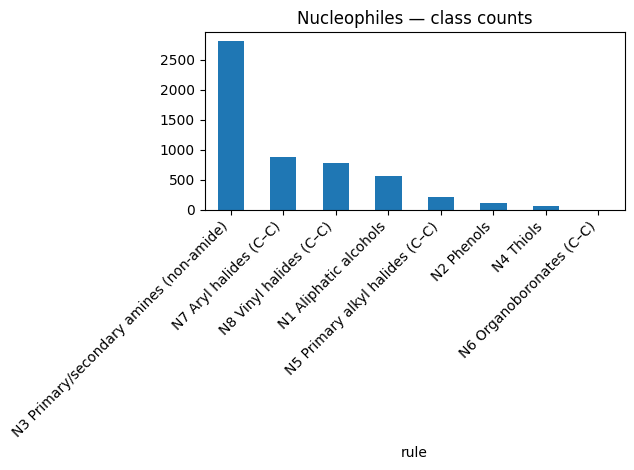

Annotating electrophiles_BBs.smi:   0%|          | 0/483 [00:00<?, ?mol/s]

Electrophiles: 483 rows (0 invalid).


rule  count
0  E7 Primary alkyl halides    210
1        E8 Allylic halides    157
2       E1 Carboxylic acids    153
3       E3 Sulfonyl halides     11
4       E9 Benzylic halides      1
5           E2 Acyl halides      1

<Figure size 1000x400 with 0 Axes>

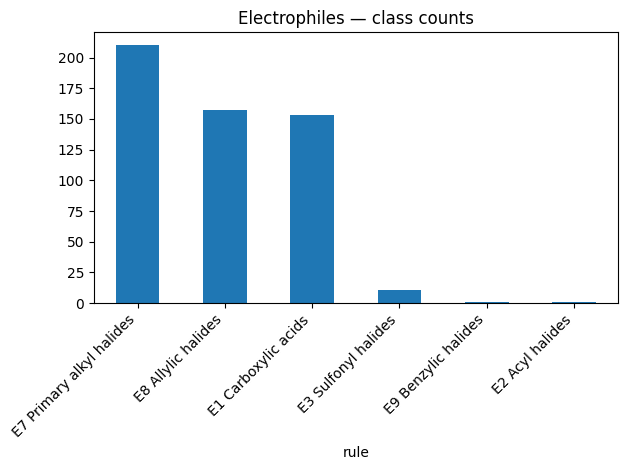

Annotating buchwald_hartwig_BBs.smi:   0%|          | 0/886 [00:00<?, ?mol/s]

Buchwald–Hartwig: 886 rows (0 invalid).


rule  count
0  BH1 Aryl halides    886

<Figure size 1000x400 with 0 Axes>

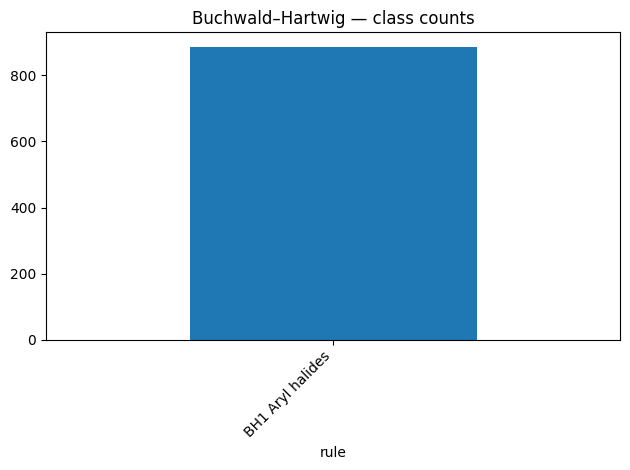

Annotating snar_BBs.smi:   0%|          | 0/279 [00:00<?, ?mol/s]

SNAr: 279 rows (0 invalid).


rule  count
0  SN1 Aryl fluorides    279

<Figure size 1000x400 with 0 Axes>

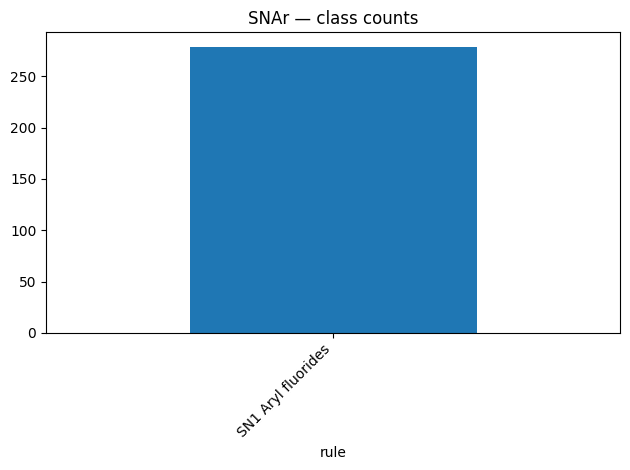

Annotating chan_lam_BBs.smi:   0%|          | 0/6 [00:00<?, ?mol/s]

Chan–Lam: 6 rows (0 invalid).


rule  count
0  CL3 Siloxanes      4
1  CL2 Stannanes      2

<Figure size 1000x400 with 0 Axes>

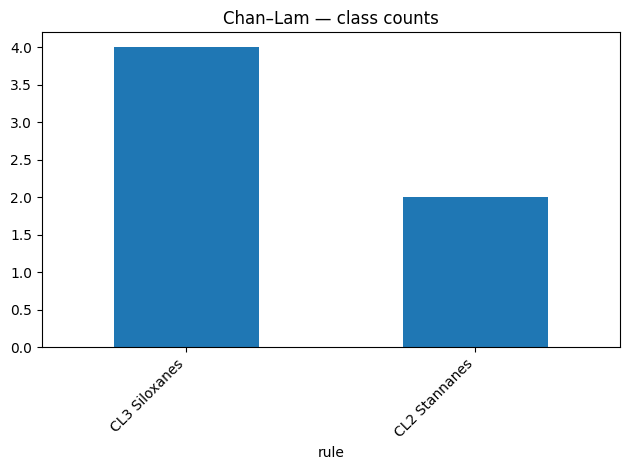

Saved: nucleophiles_annotated.csv, nucleophiles_class_counts.csv, electrophiles_annotated.csv, electrophiles_class_counts.csv, buchwald_hartwig_annotated.csv, buchwald_hartwig_class_counts.csv, snar_annotated.csv, snar_class_counts.csv, chan_lam_annotated.csv, chan_lam_class_counts.csv


In [42]:
# @title Classify & annotate reagents (per-molecule CSVs + counts + bar charts)
nucleophiles_path   = "/content/nucleophiles_BBs.smi"   #@param {type:"string"}
electrophiles_path  = "/content/electrophiles_BBs.smi"  #@param {type:"string"}
buchwald_path       = "/content/buchwald_hartwig_BBs.smi"   #@param {type:"string"}
snar_path           = "/content/snar_BBs.smi"   #@param {type:"string"}
chan_lam_path       = "/content/chan_lam_BBs.smi"   #@param {type:"string"}
max_rows_each_file  = 0                                       #@param {type:"integer"}  # 0 = all rows
progress_batch      = 5000                                    #@param {type:"integer"}  # bar ticks every N lines
save_csv            = True                                    #@param {type:"boolean"}

import os, re, gzip, collections, pandas as pd, matplotlib.pyplot as plt
from rdkit import Chem, RDLogger, DataStructs
from rdkit.Chem import rdchem
from tqdm.auto import tqdm
from IPython.display import display

RDLogger.DisableLog("rdApp.*")

# ---------------- SMARTS & helpers (same chemistry as the scanner, plus new classes) ----------------
# Electrophiles
ELECTROPHILE_SMARTS = {
    "carboxylic_acid": r"[CX3](=O)[OX2H1]",
    "acyl_halide": r"[CX3](=O)[F,Cl,Br,I]",
    "sulfonyl_halide": r"[#16X4](=O)(=O)[F,Cl,Br,I]",
    "chloro_or_fluoro_formate": r"[OX2][CX3](=O)[F,Cl]",
    "isocyanate": r"[NX2]=C=O",
    "alkyl_sulfonate": r"[CH2,CH3][OX2][#16X4](=O)(=O)[#6]",
}
E_Q = {k: Chem.MolFromSmarts(v) for k,v in ELECTROPHILE_SMARTS.items()}

# Nucleophiles / coupling partners (Exit 7-style)
NUCLEOPHILE_SMARTS_BASE = {
    "aliphatic_alcohol": r"[OX2H][CX4;!$(C=*)]",
    "phenol": r"[OX2H]c",
    "thiol": r"[SX2H]",
    "amine_H": r"[NX3;H2,H1]",   # exclude amide/sulfonamide Ns via heuristic below
}
N_Q = {k: Chem.MolFromSmarts(v) for k,v in NUCLEOPHILE_SMARTS_BASE.items()}

# Buchwald–Hartwig extra SMARTS
BUCHWALD_SMARTS = {
    "aryl_triflate": r"cO[#16X4](=O)(=O)C(F)(F)(F)",  # aryl–O–SO2–CF3 (–OTf)
}
BH_Q = {k: Chem.MolFromSmarts(v) for k,v in BUCHWALD_SMARTS.items()}

# SNAr extras
SNAR_SMARTS = {
    "aryl_diazonium": r"c[N+]#N",
}
SNAR_Q = {k: Chem.MolFromSmarts(v) for k,v in SNAR_SMARTS.items()}

# Chan–Lam extras
CHAN_LAM_SMARTS = {
    "boronic_acid": r"[#6]-[B]([OX2H])[OX2H]",
}
CL_Q = {k: Chem.MolFromSmarts(v) for k,v in CHAN_LAM_SMARTS.items()}

# ---------- structural helpers ----------
def is_amide_like_N(mol: Chem.Mol, n_idx: int) -> bool:
    n = mol.GetAtomWithIdx(n_idx)
    for nb in n.GetNeighbors():
        if nb.GetSymbol()=="C":
            for b in nb.GetBonds():
                if b.GetBondType()==rdchem.BondType.DOUBLE and b.GetOtherAtom(nb).GetSymbol() in ("O","S"):
                    return True
        if nb.GetSymbol()=="S":
            dbO = sum(1 for b in nb.GetBonds()
                      if b.GetBondType()==rdchem.BondType.DOUBLE and b.GetOtherAtom(nb).GetSymbol()=="O")
            if dbO >= 2: return True
    return False

def has_primary_alkyl_halide(mol: Chem.Mol) -> bool:
    for x in (a for a in mol.GetAtoms() if a.GetSymbol() in ("Cl","Br","I")):
        for c in x.GetNeighbors():
            if c.GetAtomicNum()==6 and c.GetHybridization()==rdchem.HybridizationType.SP3 and c.GetTotalNumHs()>=2:
                return True
    return False

def has_allylic_halide(mol: Chem.Mol) -> bool:
    for x in (a for a in mol.GetAtoms() if a.GetSymbol() in ("Cl","Br","I")):
        for c in x.GetNeighbors():
            if c.GetAtomicNum()==6 and c.GetHybridization()==rdchem.HybridizationType.SP3 and c.GetTotalNumHs()>=1:
                if any(nb.GetAtomicNum()==6 and nb.GetHybridization()==rdchem.HybridizationType.SP2 and nb.GetIdx()!=x.GetIdx()
                       for nb in c.GetNeighbors()):
                    return True
    return False

def has_benzylic_halide(mol: Chem.Mol) -> bool:
    for x in (a for a in mol.GetAtoms() if a.GetSymbol() in ("Cl","Br","I")):
        for c in x.GetNeighbors():
            if c.GetAtomicNum()==6 and c.GetHybridization()==rdchem.HybridizationType.SP3:
                if any(nb.GetAtomicNum()==6 and nb.GetIsAromatic() and nb.GetIdx()!=x.GetIdx() for nb in c.GetNeighbors()):
                    return True
    return False

def is_organoboron_partner(mol: Chem.Mol) -> bool:
    for b in (a for a in mol.GetAtoms() if a.GetSymbol()=="B"):
        has_c = any(nb.GetSymbol()=="C" for nb in b.GetNeighbors())
        o_count = sum(1 for nb in b.GetNeighbors() if nb.GetSymbol()=="O")
        if has_c and o_count >= 2:
            return True
    return False

def has_aryl_halide(mol: Chem.Mol) -> bool:
    for x in (a for a in mol.GetAtoms() if a.GetSymbol() in ("Cl","Br","I")):
        if any(nb.GetAtomicNum()==6 and nb.GetIsAromatic() for nb in x.GetNeighbors()):
            return True
    return False

def has_vinyl_halide(mol: Chem.Mol) -> bool:
    for x in (a for a in mol.GetAtoms() if a.GetSymbol() in ("Cl","Br","I")):
        if any(nb.GetAtomicNum()==6 and not nb.GetIsAromatic() and nb.GetHybridization()==rdchem.HybridizationType.SP2
               for nb in x.GetNeighbors()):
            return True
    return False

def has_aryl_fluoride(mol: Chem.Mol) -> bool:
    for f in (a for a in mol.GetAtoms() if a.GetSymbol()=="F"):
        if any(nb.GetAtomicNum()==6 and nb.GetIsAromatic() for nb in f.GetNeighbors()):
            return True
    return False

def has_aryl_triflate(mol: Chem.Mol) -> bool:
    q = BH_Q["aryl_triflate"]
    return q is not None and mol.HasSubstructMatch(q)

def has_aryl_diazonium(mol: Chem.Mol) -> bool:
    q = SNAR_Q["aryl_diazonium"]
    return q is not None and mol.HasSubstructMatch(q)

def is_boronic_acid(mol: Chem.Mol) -> bool:
    q = CL_Q["boronic_acid"]
    return q is not None and mol.HasSubstructMatch(q)

def has_stannane(mol: Chem.Mol) -> bool:
    for sn in (a for a in mol.GetAtoms() if a.GetSymbol()=="Sn"):
        if any(nb.GetAtomicNum()==6 for nb in sn.GetNeighbors()):
            return True
    return False

def has_siloxane(mol: Chem.Mol) -> bool:
    for si in (a for a in mol.GetAtoms() if a.GetSymbol()=="Si"):
        has_c = any(nb.GetAtomicNum()==6 for nb in si.GetNeighbors())
        has_o = any(nb.GetAtomicNum()==8 for nb in si.GetNeighbors())
        if has_c and has_o:
            return True
    return False

# ---------------- Human labels (REOS-style) ----------------
E_LABEL = {
    "carboxylic_acid":         "E1 Carboxylic acids",
    "acyl_halide":             "E2 Acyl halides",
    "sulfonyl_halide":         "E3 Sulfonyl halides",
    "chloro_or_fluoro_formate":"E4 Chloro/fluoroformates",
    "isocyanate":              "E5 Isocyanates",
    "alkyl_sulfonate":         "E6 Alkyl sulfonates",
    "primary_alkyl_halide":    "E7 Primary alkyl halides",
    "allylic_halide":          "E8 Allylic halides",
    "benzylic_halide":         "E9 Benzylic halides",
    "ok":                      "ok",
    "__invalid__":             "__invalid__",
}
N_LABEL = {
    "aliphatic_alcohol":       "N1 Aliphatic alcohols",
    "phenol":                  "N2 Phenols",
    "amine":                   "N3 Primary/secondary amines (non-amide)",
    "thiol":                   "N4 Thiols",
    "primary_alkyl_halide":    "N5 Primary alkyl halides (C–C)",
    "organoboron":             "N6 Organoboronates (C–C)",
    "aryl_halide":             "N7 Aryl halides (C–C)",
    "vinyl_halide":            "N8 Vinyl halides (C–C)",
    "ok":                      "ok",
    "__invalid__":             "__invalid__",
}
BH_LABEL = {
    "aryl_halide":             "BH1 Aryl halides",
    "aryl_triflate":           "BH2 Aryl triflates",
    "ok":                      "ok",
    "__invalid__":             "__invalid__",
}
SNAR_LABEL = {
    "aryl_fluoride":           "SN1 Aryl fluorides",
    "aryl_diazonium":          "SN2 Aryl diazonium",
    "ok":                      "ok",
    "__invalid__":             "__invalid__",
}
CL_LABEL = {
    "boronic_acid":            "CL1 Boronic acids",
    "stannane":                "CL2 Stannanes",
    "siloxane":                "CL3 Siloxanes",
    "ok":                      "ok",
    "__invalid__":             "__invalid__",
}

# Priority orders (choose one "primary_label" per molecule)
E_PRI  = ["acyl_halide","sulfonyl_halide","chloro_or_fluoro_formate","isocyanate",
          "carboxylic_acid","alkyl_sulfonate","primary_alkyl_halide","allylic_halide","benzylic_halide"]
N_PRI  = ["amine","aliphatic_alcohol","phenol","thiol","organoboron","aryl_halide","vinyl_halide","primary_alkyl_halide"]
BH_PRI = ["aryl_triflate","aryl_halide"]
SN_PRI = ["aryl_diazonium","aryl_fluoride"]
CL_PRI = ["boronic_acid","stannane","siloxane"]

def pick_primary(tags, order):
    for t in order:
        if t in tags: return t
    return "ok" if not tags else sorted(tags)[0]

# ---------------- Classification functions ----------------
def classify_electrophile_tags(mol: Chem.Mol):
    tags = set()
    for tag, q in E_Q.items():
        if q is not None and mol.HasSubstructMatch(q):
            tags.add(tag)
    if has_primary_alkyl_halide(mol): tags.add("primary_alkyl_halide")
    if has_allylic_halide(mol):       tags.add("allylic_halide")
    if has_benzylic_halide(mol):      tags.add("benzylic_halide")
    return tags

def classify_nucleophile_tags(mol: Chem.Mol):
    tags = set()
    for tag, q in N_Q.items():
        if q is None:
            continue
        if tag == "amine_H":
            for match in mol.GetSubstructMatches(q):
                n_idx = match[0]
                if mol.GetAtomWithIdx(n_idx).GetTotalNumHs()>=1 and not is_amide_like_N(mol, n_idx):
                    tags.add("amine"); break
        else:
            if mol.HasSubstructMatch(q):
                tags.add(tag)
    if has_primary_alkyl_halide(mol): tags.add("primary_alkyl_halide")
    if is_organoboron_partner(mol):   tags.add("organoboron")
    if has_aryl_halide(mol):          tags.add("aryl_halide")
    if has_vinyl_halide(mol):         tags.add("vinyl_halide")
    return tags

def classify_buchwald_tags(mol: Chem.Mol):
    tags = set()
    if has_aryl_halide(mol):  tags.add("aryl_halide")
    if has_aryl_triflate(mol): tags.add("aryl_triflate")
    return tags

def classify_snar_tags(mol: Chem.Mol):
    tags = set()
    if has_aryl_fluoride(mol):  tags.add("aryl_fluoride")
    if has_aryl_diazonium(mol): tags.add("aryl_diazonium")
    return tags

def classify_chanlam_tags(mol: Chem.Mol):
    tags = set()
    if is_boronic_acid(mol): tags.add("boronic_acid")
    if has_stannane(mol):    tags.add("stannane")
    if has_siloxane(mol):    tags.add("siloxane")
    return tags

# ---------------- I/O helpers + progress ----------------
def _open_text(path):
    return gzip.open(path, "rt", encoding="utf-8", errors="ignore") if path.endswith(".gz") else open(path, "rt", encoding="utf-8", errors="ignore")

def _count_lines(path, limit=0):
    n = 0
    with _open_text(path) as fh:
        for _ in fh:
            n += 1
            if limit and n >= limit: break
    return n

def annotate_file(path: str, tag_func, pri_order, label_map, max_rows=0, pbatch=5000):
    rows = []
    counts = collections.Counter()
    invalid = 0

    # pre-count so the bar has %/ETA (optional)
    total_lines = _count_lines(path, limit=max_rows or 0)
    total_lines = total_lines if total_lines>0 else None

    with _open_text(path) as fh, tqdm(total=total_lines, desc=f"Annotating {os.path.basename(path)}", unit="mol") as pbar:
        bumped = 0
        for i, line in enumerate(fh, 1):
            if max_rows and i > max_rows: break
            s = line.strip()
            if not s or s.startswith("#"):
                if total_lines: pbar.update(1); continue
                else: continue
            smi = re.split(r"\s+|,", s, maxsplit=1)[0]

            m = Chem.MolFromSmiles(smi)
            if m is None:
                invalid += 1
                rows.append({"smiles": smi, "canonical_smiles": None,
                             "labels": "__invalid__", "primary_label": "__invalid__"})
                bumped += 1
            else:
                can = Chem.MolToSmiles(m, canonical=True)
                tags = tag_func(m)
                primary = pick_primary(tags, pri_order)
                label_list = sorted(tags) if tags else []
                rows.append({"smiles": smi, "canonical_smiles": can,
                             "labels": ";".join(label_list) if label_list else "ok",
                             "primary_label": primary})
                if not tags:
                    counts["ok"] += 1
                else:
                    for t in tags: counts[t] += 1
                bumped += 1

            if total_lines:
                # update bar in batches to keep UI smooth
                if bumped >= pbatch:
                    pbar.update(bumped); bumped = 0

        if total_lines and bumped:
            pbar.update(bumped)

    # build count table (REOS-style)
    rows_counts = [{"rule": label_map.get(tag, tag), "count": cnt}
                   for tag, cnt in counts.most_common()]
    df_counts = pd.DataFrame(rows_counts, columns=["rule","count"])
    df_annot  = pd.DataFrame(rows, columns=["smiles","canonical_smiles","labels","primary_label"])
    return df_annot, df_counts, invalid

# ---------------- RUN: annotate + save + plot ----------------
outputs = []

# Nucleophiles
if nucleophiles_path and os.path.exists(nucleophiles_path):
    dfN, dfN_counts, badN = annotate_file(nucleophiles_path, classify_nucleophile_tags, N_PRI, N_LABEL,
                                          max_rows=max_rows_each_file, pbatch=progress_batch)
    print(f"Nucleophiles: {len(dfN)} rows ({badN} invalid).")
    display(dfN_counts)
    outputs.append(("nucleophiles_annotated.csv", dfN))
    outputs.append(("nucleophiles_class_counts.csv", dfN_counts))
    if not dfN_counts.empty:
        plt.figure(figsize=(10,4))
        dfN_counts.plot(kind="bar", x="rule", y="count", legend=False)
        plt.xticks(rotation=45, ha="right"); plt.title("Nucleophiles — class counts"); plt.tight_layout(); plt.show()

# Electrophiles
if electrophiles_path and os.path.exists(electrophiles_path):
    dfE, dfE_counts, badE = annotate_file(electrophiles_path, classify_electrophile_tags, E_PRI, E_LABEL,
                                          max_rows=max_rows_each_file, pbatch=progress_batch)
    print(f"Electrophiles: {len(dfE)} rows ({badE} invalid).")
    display(dfE_counts)
    outputs.append(("electrophiles_annotated.csv", dfE))
    outputs.append(("electrophiles_class_counts.csv", dfE_counts))
    if not dfE_counts.empty:
        plt.figure(figsize=(10,4))
        dfE_counts.plot(kind="bar", x="rule", y="count", legend=False)
        plt.xticks(rotation=45, ha="right"); plt.title("Electrophiles — class counts"); plt.tight_layout(); plt.show()

# Buchwald–Hartwig
if buchwald_path and os.path.exists(buchwald_path):
    dfBH, dfBH_counts, badBH = annotate_file(buchwald_path, classify_buchwald_tags, BH_PRI, BH_LABEL,
                                             max_rows=max_rows_each_file, pbatch=progress_batch)
    print(f"Buchwald–Hartwig: {len(dfBH)} rows ({badBH} invalid).")
    display(dfBH_counts)
    outputs.append(("buchwald_hartwig_annotated.csv", dfBH))
    outputs.append(("buchwald_hartwig_class_counts.csv", dfBH_counts))
    if not dfBH_counts.empty:
        plt.figure(figsize=(10,4))
        dfBH_counts.plot(kind="bar", x="rule", y="count", legend=False)
        plt.xticks(rotation=45, ha="right"); plt.title("Buchwald–Hartwig — class counts"); plt.tight_layout(); plt.show()

# SNAr
if snar_path and os.path.exists(snar_path):
    dfSN, dfSN_counts, badSN = annotate_file(snar_path, classify_snar_tags, SN_PRI, SNAR_LABEL,
                                             max_rows=max_rows_each_file, pbatch=progress_batch)
    print(f"SNAr: {len(dfSN)} rows ({badSN} invalid).")
    display(dfSN_counts)
    outputs.append(("snar_annotated.csv", dfSN))
    outputs.append(("snar_class_counts.csv", dfSN_counts))
    if not dfSN_counts.empty:
        plt.figure(figsize=(10,4))
        dfSN_counts.plot(kind="bar", x="rule", y="count", legend=False)
        plt.xticks(rotation=45, ha="right"); plt.title("SNAr — class counts"); plt.tight_layout(); plt.show()

# Chan–Lam
if chan_lam_path and os.path.exists(chan_lam_path):
    dfCL, dfCL_counts, badCL = annotate_file(chan_lam_path, classify_chanlam_tags, CL_PRI, CL_LABEL,
                                             max_rows=max_rows_each_file, pbatch=progress_batch)
    print(f"Chan–Lam: {len(dfCL)} rows ({badCL} invalid).")
    display(dfCL_counts)
    outputs.append(("chan_lam_annotated.csv", dfCL))
    outputs.append(("chan_lam_class_counts.csv", dfCL_counts))
    if not dfCL_counts.empty:
        plt.figure(figsize=(10,4))
        dfCL_counts.plot(kind="bar", x="rule", y="count", legend=False)
        plt.xticks(rotation=45, ha="right"); plt.title("Chan–Lam — class counts"); plt.tight_layout(); plt.show()

# save CSVs
if save_csv and outputs:
    for path, df in outputs:
        df.to_csv(path, index=False)
    print("Saved:", ", ".join(p for p,_ in outputs))


# 4. Combinatorial Library Enumerator 🤖 🧠

In [45]:
# @title Exit-5 (ring NH) library enumerator — Electrophiles, Buchwald–Hartwig, SNAr, Chan–Lam 🤖 🧠
# (Colab-ready; supports .smi/.txt/.csv and .gz variants; one SMILES per line)
# Optional (first time in Colab):
# !pip -q install rdkit-pypi ipywidgets tqdm
# from google.colab import output; output.enable_custom_widget_manager()

# --- Core & UI defaults ---
CORE_SMILES      = "O=C(O)[C@@H]1CNC[C@H]1c2cccc(F)c2"      # ring NH must be present
ELECTROPHILES_SMI= ""                                # e.g. /content/electrophiles_BBs.smi
BUCHWALD_SMI     = ""                                # e.g. /content/buchwald_hartwig_BBs.smi
SNAR_SMI         = ""                                # e.g. /content/snar_BBs.smi
CHAN_LAM_SMI     = ""                                # e.g. /content/chan_lam_BBs.smi
PREVIEW_N        = 40                                # preview molecules per bucket
DEDUPE           = True                              # dedupe products within each bucket and overall

import os, re, glob, gzip, io, collections
from typing import Iterable, List, Tuple, Dict
from IPython.display import display, clear_output, FileLink # Import FileLink here
from rdkit import Chem, RDLogger
from rdkit.Chem import AllChem, Draw, rdchem
from tqdm.auto import tqdm
import zipfile # Import zipfile here
from google.colab import files # Import files for download
import pandas as pd # Import pandas for writing CSV

# UI (optional but nice)
try:
    import ipywidgets as W
    HAS_UI = True
except Exception:
    HAS_UI = False

RDLogger.DisableLog("rdApp.*")

# ---------- Helpers ----------
def _open_text_any(path):
    if path.endswith(".gz"):
        return io.TextIOWrapper(gzip.open(path, "rb"), encoding="utf-8", errors="ignore")
    return open(path, "rt", encoding="utf-8", errors="ignore")

def iter_smis_with_id(path: str) -> Iterable[Tuple[str, str]]:
    """Yield (smiles, identifier) from various formats."""
    with _open_text_any(path) as f:
        for line in f:
            s = line.strip()
            if not s or s.startswith("#"):
                continue
            parts = re.split(r"\s+|,", s, maxsplit=1) # Split into max 2 parts: SMILES, ID
            smi = parts[0] if len(parts) > 0 else None
            identifier = parts[1] if len(parts) > 1 else "N/A"
            if smi:
                yield smi, identifier
            else:
                yield None, identifier # Yield None SMILES if parsing failed


def resolve_paths(text: str) -> List[str]:
    """Accept comma-separated paths/globs; return existing files (sorted, deduped)."""
    picks = []
    for part in [p.strip() for p in text.split(",") if p.strip()]:
        matches = sorted(glob.glob(part))
        if matches:
            picks.extend(matches)
        elif os.path.isfile(part):
            picks.append(part)
    # unique preserve order
    seen = set(); out=[]
    for p in picks:
        if p not in seen:
            out.append(p); seen.add(p)
    return out

def _sanitize_and_smiles(mol: Chem.Mol) -> str | None:
    try:
        for a in mol.GetAtoms():
            a.SetAtomMapNum(0)
        Chem.SanitizeMol(mol)
        return Chem.MolToSmiles(mol, isomericSmiles=True)
    except Exception:
        return None

def _preview(molecules: List[Tuple[str, str]], title: str):
    """Preview molecules with SMILES and ZINC_ID."""
    if not molecules: return
    sample = molecules[:PREVIEW_N]
    df_preview = pd.DataFrame(sample, columns=["smiles", "ZINC_ID"])
    df_preview["mol"] = df_preview["smiles"].apply(Chem.MolFromSmiles)
    df_preview = df_preview[df_preview["mol"].notna()].reset_index(drop=True) # Filter invalid

    if df_preview.empty:
        print(f"No valid molecules to preview for {title}.")
        return None

    import mols2grid # Import mols2grid here

    # Use mols2grid to display
    grid = mols2grid.display(
        df_preview,
        mol_col="mol",
        smiles_col="smiles",
        subset=["img", "ZINC_ID", "smiles"], # Include image, ZINC_ID, and SMILES
        tooltip=["ZINC_ID", "smiles"], # Show ZINC_ID and SMILES on hover
        use_svg=True,
        n_cols=6, # Adjust number of columns as needed
        # Customize display of ZINC_ID
        transform={"ZINC_ID": lambda x: f"ID: {x}"}
    )
    print(f"Preview: {title} ({len(df_preview)} shown)")
    display(grid)
    return grid # Return the grid object if needed later


# ---------- Electrophile classification (Exit-5: acyl/sulfonyl etc.) ----------
ELECTROPHILE_SMARTS = {
    "carboxylic_acid":        r"[CX3](=O)[OX2H1]",
    "acyl_halide":            r"[CX3](=O)[F,Cl,Br,I]",
    "sulfonyl_halide":        r"[#16X4](=O)(=O)[F,Cl,Br,I]",
    "chloro_or_fluoro_formate": r"[OX2][CX3](=O)[F,Cl]",
    "isocyanate":             r"[NX2]=C=O",
    "alkyl_sulfonate":        r"[CH2,CH3][OX2][#16X4](=O)(=O)[#6]",
    "primary_alkyl_halide":   r"[CH2,CH3][Cl,Br,I]",
    "allylic_halide":         r"[Cl,Br,I][CH2][CX3]=[CX3]",
    "benzylic_halide":        r"[Cl,Br,I][CH2]c",
}
EQ = {k: Chem.MolFromSmarts(v) for k,v in ELECTROPHILE_SMARTS.items()}

_E_PRIORITY = [
    "acyl_halide","sulfonyl_halide","chloro_or_fluoro_formate","isocyanate",
    "carboxylic_acid","alkyl_sulfonate","primary_alkyl_halide","allylic_halide","benzylic_halide"
]

def classify_electrophile(mol: Chem.Mol) -> str | None:
    hits = [tag for tag in _E_PRIORITY if EQ[tag] is not None and mol.HasSubstructMatch(EQ[tag])]
    return hits[0] if hits else None

# ---------- Reaction SMARTS (first reactant is the core; enforce *ring NH* with [N;R;H1:2]) ----------
# Amide/carbamate/urea/alkylation set (selected by classification)
RXN_ELECTROPHILES = {
    "carboxylic_acid": AllChem.ReactionFromSmarts("[N;R;H1:2].[C:1](=O)[O;H1]>>[C:1](=O)[N:2]"),
    "acyl_halide":     AllChem.ReactionFromSmarts("[N;R;H1:2].[C:1](=O)[F,Cl,Br,I]>>[C:1](=O)[N:2]"),
    "sulfonyl_halide": AllChem.ReactionFromSmarts("[N;R;H1:2].[S:1](=O)(=O)[F,Cl,Br,I]>>[S:1](=O)(=O)[N:2]"),
    "chloro_or_fluoro_formate": AllChem.ReactionFromSmarts("[N;R;H1:2].[O:3][C:1](=O)[F,Cl]>>[O:3][C:1](=O)[N:2]"),
    "isocyanate":      AllChem.ReactionFromSmarts("[N;R;H1:2].[N:1]=[C:2]=O>>[N:1][C:2](=O)[N:2]"),
    "primary_alkyl_halide": AllChem.ReactionFromSmarts("[N;R;H1:2].[CH2:1][Cl,Br,I]>>[N:2][CH2:1]"),
    "allylic_halide":  AllChem.ReactionFromSmarts("[N;R;H1:2].[CH2:1][Cl,Br,I]>>[N:2][CH2:1]"),
    "benzylic_halide": AllChem.ReactionFromSmarts("[N;R;H1:2].[CH2:1][Cl,Br,I]>>[N:2][CH2:1]"),
    "alkyl_sulfonate": AllChem.ReactionFromSmarts("[N;R;H1:2].[CH2:1][O][S](=O)(=O)[#6]>>[N:2][CH2:1]"),
}

# Buchwald–Hartwig amination (generic enumeration)
RXN_BUCHWALD = [
    ("aryl_halide",  AllChem.ReactionFromSmarts("[N;R;H1:2].[c:1][F,Cl,Br,I]>>[c:1][N:2]")),
    ("aryl_triflate",AllChem.ReactionFromSmarts("[N;R;H1:2].[c:1]O[S](=O)(=O)C(F)(F)F>>[c:1][N:2]")),
]

# SNAr amination
RXN_SNAR = [
    ("aryl_fluoride", AllChem.ReactionFromSmarts("[N;R;H1:2].[c:1]F>>[c:1][N:2]")),
    ("aryl_diazonium",AllChem.ReactionFromSmarts("[N;R;H1:2].[c:1][N+]#N>>[c:1][N:2]")),
]

# Chan–Lam (oxidative coupling) — enumerate N–C bond formation generically
RXN_CHANLAM = [
    ("boronic_acid", AllChem.ReactionFromSmarts("[N;R;H1:2].[#6:1]-[B]([O])[O]>>[N:2][#6:1]")),
    ("stannane",     AllChem.ReactionFromSmarts("[N;R;H1:2].[#6:1]-[Sn]>>[N:2][#6:1]")),
    ("siloxane",     AllChem.ReactionFromSmarts("[N;R;H1:2].[#6:1]-[Si]>>[N:2][#6:1]")),
]

# ---------- Core sanity: must contain a ring –NH– ----------
core = Chem.MolFromSmiles(CORE_SMILES)
if core is None:
    raise ValueError("CORE_SMILES failed to parse.")
if not core.HasSubstructMatch(Chem.MolFromSmarts("[N;R;H1]")):
    raise ValueError("Core does not contain a ring secondary amine ([N;R;H1]).")

# ---------- Enumeration engine ----------
def enumerate_bucket(core_mol: Chem.Mol,
                     file_list: List[str],
                     rxn_spec,
                     use_classifier: bool = False,
                     stats_label: str = "bucket") -> Tuple[List[Tuple[str, str]], Dict[str,int], int]:
    """
    rxn_spec:
      - if use_classifier=True: dict[tag]->ChemicalReaction (electrophiles)
      - else: list[(tag, ChemicalReaction)] (BH, SNAr, Chan–Lam)
    returns: (unique_products_with_id, per_tag_counts, failures)
    unique_products_with_id: list of (canonical_smiles, reactant_identifier)
    """
    products_with_id = []
    seen = set() # Only store canonical SMILES for dedupe
    per_tag = collections.Counter()
    failures = 0

    # Count total reagents for a nicer tqdm
    total = 0
    for path in file_list:
        try:
            with _open_text_any(path) as f:
                total += sum(1 for line in f if line.strip() and not line.strip().startswith("#"))
        except Exception:
            pass
    pbar = tqdm(total=total if total>0 else None, desc=f"Enumerating {stats_label}", unit="mol")

    for path in file_list:
        for smi, identifier in iter_smis_with_id(path):
            rmol = Chem.MolFromSmiles(smi)
            if rmol is None:
                failures += 1; pbar.update(1); continue
            try:
                if use_classifier:  # electrophiles: pick one rule
                    tag = classify_electrophile(rmol)
                    if not tag:
                        failures += 1; pbar.update(1); continue
                    rxn = rxn_spec.get(tag)
                    outs = rxn.RunReactants((core_mol, rmol))
                    matched_any = False
                    for prods in outs:
                        ps = _sanitize_and_smiles(prods[0])
                        if not ps: continue
                        if not DEDUPE or ps not in seen:
                            products_with_id.append((ps, identifier))
                            seen.add(ps)
                            per_tag[tag] += 1
                            matched_any = True
                    if not matched_any:
                        failures += 1
                else:  # try all rules; attribute hits to their tag
                    hit_this = False
                    for tag, rxn in rxn_spec:
                        outs = rxn.RunReactants((core_mol, rmol))
                        for prods in outs:
                            ps = _sanitize_and_smiles(prods[0])
                            if not ps: continue
                            if not DEDUPE or ps not in seen:
                                products_with_id.append((ps, identifier))
                                seen.add(ps)
                                per_tag[tag] += 1
                                hit_this = True
                    if not hit_this:
                        failures += 1
            except Exception:
                failures += 1
            finally:
                pbar.update(1)
    pbar.close()
    return products_with_id, dict(per_tag), failures

def write_smi_and_csv_with_id_output(base_path: str, molecules: List[Tuple[str, str]]):
    """Writes SMILES and Reactant ZINC ID to a .smi and .csv file."""
    # Write .smi file
    smi_path = base_path + ".smi"
    with open(smi_path, "w", encoding="utf-8") as f:
        f.write("SMILES\tReactant ZINC ID\n") # Write header
        for smi, identifier in molecules:
            f.write(f"{smi}\t{identifier}\n")

    # Write .csv file
    csv_path = base_path + ".csv"
    df_output = pd.DataFrame(molecules, columns=["SMILES", "Reactant ZINC ID"])
    df_output.to_csv(csv_path, index=False)

    return smi_path, csv_path

def write_text_output(path: str, molecules: List[Tuple[str, str]]):
    """Writes Molecule Name (ZINC ID),SMILES to a text file."""
    with open(path, "w", encoding="utf-8") as f:
        f.write("molecule_name,smiles\n") # Write header
        for smi, identifier in molecules:
            f.write(f"{identifier},{smi}\n")


def run_enumeration(core_smiles: str,
                    elec_paths: List[str],
                    bh_paths: List[str],
                    snar_paths: List[str],
                    chan_paths: List[str]):
    core_mol = Chem.MolFromSmiles(core_smiles)
    if core_mol is None:
        raise ValueError("CORE_SMILES failed to parse.")
    if not core_mol.HasSubstructMatch(Chem.MolFromSmarts("[N;R;H1]")):
        raise ValueError("Core must contain a ring –NH– ([N;R;H1]).")

    all_products_with_id = []
    bucket_outputs = {}
    output_files = [] # List to store generated file paths (.smi and .csv)

    if elec_paths:
        prod_with_id, counts, fails = enumerate_bucket(core_mol, elec_paths, RXN_ELECTROPHILES, use_classifier=True, stats_label="Electrophiles")
        base_path = "exit5_products_electrophiles"
        smi_path, csv_path = write_smi_and_csv_with_id_output(base_path, prod_with_id)
        output_files.extend([smi_path, csv_path])
        print(f"[Electrophiles] products: {len(prod_with_id)}  failures: {fails}  by-class: {counts}")
        _preview(prod_with_id, "Electrophiles")
        bucket_outputs["electrophiles"] = prod_with_id
        all_products_with_id.extend(prod_with_id)


    if bh_paths:
        prod_with_id, counts, fails = enumerate_bucket(core_mol, bh_paths, RXN_BUCHWALD, use_classifier=False, stats_label="Buchwald–Hartwig")
        base_path = "exit5_products_buchwald"
        smi_path, csv_path = write_smi_and_csv_with_id_output(base_path, prod_with_id)
        output_files.extend([smi_path, csv_path])
        print(f"[Buchwald–Hartwig] products: {len(prod_with_id)}  failures: {fails}  by-class: {counts}")
        _preview(prod_with_id, "Buchwald–Hartwig")
        bucket_outputs["buchwald"] = prod_with_id
        all_products_with_id.extend(prod_with_id)

    if snar_paths:
        prod_with_id, counts, fails = enumerate_bucket(core_mol, snar_paths, RXN_SNAR, use_classifier=False, stats_label="SNAr")
        base_path = "exit5_products_snar"
        smi_path, csv_path = write_smi_and_csv_with_id_output(base_path, prod_with_id)
        output_files.extend([smi_path, csv_path])
        print(f"[SNAr] products: {len(prod_with_id)}  failures: {fails}  by-class: {counts}")
        _preview(prod_with_id, "SNAr")
        bucket_outputs["snar"] = prod_with_id
        all_products_with_id.extend(prod_with_id)

    if chan_paths:
        prod_with_id, counts, fails = enumerate_bucket(core_mol, chan_paths, RXN_CHANLAM, use_classifier=False, stats_label="Chan–Lam")
        base_path = "exit5_products_chan_lam"
        smi_path, csv_path = write_smi_and_csv_with_id_output(base_path, prod_with_id)
        output_files.extend([smi_path, csv_path])
        print(f"[Chan–Lam] products: {len(prod_with_id)}  failures: {fails}  by-class: {counts}")
        _preview(prod_with_id, "Chan–Lam")
        bucket_outputs["chan_lam"] = prod_with_id
        all_products_with_id.extend(prod_with_id)


    # Combined (dedupe again if requested)
    if DEDUPE:
        # Dedupe based on SMILES, keeping the first occurrence's ZINC_ID
        unique_products_dict = {}
        for smi, zinc_id in all_products_with_id:
            if smi not in unique_products_dict:
                unique_products_dict[smi] = zinc_id
        all_products_with_id = sorted(unique_products_dict.items())


    base_path = "exit5_products_all"
    smi_path, csv_path = write_smi_and_csv_with_id_output(base_path, all_products_with_id)
    output_files.extend([smi_path, csv_path])
    print(f"[ALL] unique products total: {len(all_products_with_id)}  (written to {base_path}.smi and {base_path}.csv)")

    # Write combined text file
    text_path = "exit5_products_all.txt"
    write_text_output(text_path, all_products_with_id)
    output_files.append(text_path)
    print(f"Combined text file written to {text_path}")


    # --- Zipping and Downloading ---
    zip_filename = 'exit_products.zip'
    zip_filepath = os.path.join('/content/', zip_filename) # Save to /content/

    with zipfile.ZipFile(zip_filepath, 'w') as zipf:
        for file in output_files:
            if os.path.exists(file):
                zipf.write(file, os.path.basename(file))
            else:
                print(f"Warning: {file} not found and will not be included in the zip.")

    print(f"\nZip file created at {zip_filepath}")

    # Trigger automatic download
    try:
        files.download(zip_filepath)
        print(f"Downloading {zip_filename}...")
    except Exception as e:
        print(f"Error initiating download: {e}")
        # Fallback to displaying FileLink if automatic download fails
        display(FileLink(zip_filepath))


    return bucket_outputs, all_products_with_id


# ---------- UI ----------
if HAS_UI:
    cat_labels = ["Electrophiles", "Nucleophiles", "Buchwald–Hartwig", "SNAr", "Chan–Lam"]
    checks = {lbl: W.Checkbox(value=True, description=lbl) for lbl in cat_labels}
    cats_box = W.VBox([checks[lbl] for lbl in cat_labels])

    core_txt = W.Text(value=CORE_SMILES, description="Core SMILES:", layout=W.Layout(width="100%"))
    elec_txt = W.Text(value=ELECTROPHILES_SMI, description="Electrophiles BBs (.smi glob):", layout=W.Layout(width="100%"))
    bh_txt   = W.Text(value=BUCHWALD_SMI, description="Buchwald-Hartwig BBs (.smi glob):", layout=W.Layout(width="100%"))
    snar_txt = W.Text(value=SNAR_SMI, description="SNAr BBs (.smi glob):", layout=W.Layout(width="100%"))
    chan_txt = W.Text(value=CHAN_LAM_SMI, description="Chan-Lam BBs (.smi glob):", layout=W.Layout(width="100%"))
    dedupe_cb = W.Checkbox(value=DEDUPE, description="Deduplicate products")

    run_btn   = W.Button(description="Enumerate library", button_style="primary")
    out_area  = W.Output()

    def _on_run(_):
        global DEDUPE
        DEDUPE = dedupe_cb.value
        with out_area:
            clear_output()
            # resolve globs / comma-lists
            elec_paths = resolve_paths(elec_txt.value)
            bh_paths   = resolve_paths(bh_txt.value)
            snar_paths = resolve_paths(snar_txt.value)
            chan_paths = resolve_paths(chan_txt.value)

            def _print_found(label, paths):
                if paths:
                    print(f"{label}: {len(paths)} file(s)")
                    for p in paths: print("  •", p)
                else:
                    print(f"{label}: (none)")

            _print_found("Electrophiles", elec_paths)
            _print_found("Buchwald–Hartwig", bh_paths)
            _print_found("SNAr", snar_paths)
            _print_found("Chan–Lam", chan_paths)
            print("-"*60)

            try:
                run_enumeration(core_txt.value, elec_paths, bh_paths, snar_paths, chan_paths)
                print("Done.")
            except Exception as e:
                print("[ERROR]", e)

    run_btn.on_click(_on_run)

    ui = W.VBox([
        W.HTML("<h4>Exit-5 (ring NH) reactions → amides/carbamates/ureas/arylated/alkylated amines</h4>"),
        core_txt,
        elec_txt,
        bh_txt,
        snar_txt,
        chan_txt,
        dedupe_cb,
        run_btn,
        W.HTML("<hr>"),
        out_area
    ])
    display(ui)
else:
    print("ipywidgets not available — running immediately with current variables.")
    run_enumeration(
        CORE_SMILES,
        resolve_paths(ELECTROPHILES_SMI),
        resolve_paths(BUCHWALS_SMI),
        resolve_paths(SNAR_SMI),
        resolve_paths(CHAN_LAM_SMI),
    )

In [46]:
#@title Display the exit_products dataframe and read the first 50 lines
import pandas as pd

file_path = '/content/exit5_products_all.csv'

try:
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Display the first 50 lines
    print("First 50 lines of the DataFrame:")
    display(df.head(50))

    # Print the total number of lines
    print(f"\nTotal number of lines in the DataFrame: {len(df)}")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

First 50 lines of the DataFrame:


SMILES  Reactant ZINC ID
0   C#CC1(NCCCCN2C[C@@H](C(=O)O)[C@H](c3cccc(F)c3)...  ZINCbn0000005n3z
1   C#CC1CCCN(CCN2C[C@@H](C(=O)O)[C@H](c3cccc(F)c3...  ZINCbn00000033Q6
2   C#CC1CCN(CCN2C[C@@H](C(=O)O)[C@H](c3cccc(F)c3)...  ZINCbn0000001bXN
3   C#CCC(=O)OC(CBr)CN1C[C@@H](C(=O)O)[C@H](c2cccc...  ZINCbn0000001z2K
4   C#CCCC(=O)OCCCN1C[C@@H](C(=O)O)[C@H](c2cccc(F)...  ZINCbn0000002U5l
5   C#CCCCC(=O)OCCN1C[C@@H](C(=O)O)[C@H](c2cccc(F)...  ZINCbn0000001z2M
6   C#CCCCOC(=O)CCN1C[C@@H](C(=O)O)[C@H](c2cccc(F)...  ZINCbn0000001z2P
7   C#CCCN=c1[nH]c(N2C[C@@H](C(=O)O)[C@H](c3cccc(F...  ZINCbn0000005uuv
8   C#CCCN=c1nc(N2C[C@@H](C(=O)O)[C@H](c3cccc(F)c3...  ZINCbn0000001DGx
9   C#CCCOC(=O)CCCN1C[C@@H](C(=O)O)[C@H](c2cccc(F)...  ZINCbn0000001z2U
10  C#CCCOC(=O)[C@@H](Br)CN1C[C@@H](C(=O)O)[C@H](c...  ZINCbn0000001z2W
11  C#CCCOC(=O)[C@H](Br)CN1C[C@@H](C(=O)O)[C@H](c2...  ZINCbn0000001z2Y
12  C#CCCOc1nnc(N2C[C@@H](C(=O)O)[C@H](c3cccc(F)c3...  ZINCbn0000005oc2
13  C#CCN(CCF)CCCN1C[C@@H](C(=O)O)[C@H](c2cccc(F)c...  ZINCbn0000001bZG
14  C#CCN(CCN1C[C@@H](C(=O)O)[C@H](c2cccc(F)c2)C1)...  ZINCbn0000001bZH
15  C#CCN=c1cc[nH]cc1N1C[C@@H](C(=O)O)[C@H](c2cccc...  ZINCbn0000001c0p
16  C#CCOC(=O)CCCCN1C[C@@H](C(=O)O)[C@H](c2cccc(F)...  ZINCbn0000001z32
17  C#CCONc1nc(N2C[C@@H](C(=O)O)[C@H](c3cccc(F)c3)...  ZINCbn0000005pnu
18  C#CCONc1ncc(N2C[C@@H](C(=O)O)[C@H](c3cccc(F)c3...  ZINCbn0000005pnt
19  C#CCOc1ccc(N2C[C@@H](C(=O)O)[C@H](c3cccc(F)c3)...  ZINCbn0000004RO8
20  C#CCOc1cccnc1N1C[C@@H](C(=O)O)[C@H](c2cccc(F)c...  ZINCbn0000001z35
21  C#CCOc1ccncc1N1C[C@@H](C(=O)O)[C@H](c2cccc(F)c...  ZINCbn0000005pbq
22  C#CCOc1cncc(N2C[C@@H](C(=O)O)[C@H](c3cccc(F)c3...  ZINCbn0000001z36
23  C#CCOc1ncccc1N1C[C@@H](C(=O)O)[C@H](c2cccc(F)c...  ZINCbn0000004ROg
24  C#C[C@@H](C)N=c1nc(N2C[C@@H](C(=O)O)[C@H](c3cc...  ZINCbn0000001DGz
25  C#C[C@@H](C)OC(=O)CCCN1C[C@@H](C(=O)O)[C@H](c2...  ZINCbn0000001z3b
26  C#C[C@@H](C)OC(=O)[C@@H](Br)CN1C[C@@H](C(=O)O)...  ZINCbn0000001z3d
27  C#C[C@@H](C)OC(=O)[C@H](Br)CN1C[C@@H](C(=O)O)[...  ZINCbn0000001z3f
28  C#C[C@@H]1CCN1CCCCN1C[C@@H](C(=O)O)[C@H](c2ccc...  ZINCbn0000005uRH
29  C#C[C@H](C)N=c1nc(N2C[C@@H](C(=O)O)[C@H](c3ccc...  ZINCbn0000001DGA
30  C#C[C@H](C)OC(=O)CCCN1C[C@@H](C(=O)O)[C@H](c2c...  ZINCbn0000001z3l
31  C#C[C@H](C)OC(=O)[C@@H](Br)CN1C[C@@H](C(=O)O)[...  ZINCbn0000001z3n
32  C#C[C@H](C)OC(=O)[C@H](Br)CN1C[C@@H](C(=O)O)[C...  ZINCbn0000001z3p
33  C#C[C@H]1CCCN(CCN2C[C@@H](C(=O)O)[C@H](c3cccc(...  ZINCbn0000001c2p
34  C#C[C@H]1CCN1CCCCN1C[C@@H](C(=O)O)[C@H](c2cccc...  ZINCbn0000005osQ
35  C#Cc1cc(C#C)cc(N2C[C@@H](C(=O)O)[C@H](c3cccc(F...  ZINCbn0000003Z0V
36  C#Cc1ccc(C#C)c(N2C[C@@H](C(=O)O)[C@H](c3cccc(F...  ZINCbn0000002lcE
37  C/C(=C/c1ccco1)C(=O)N1C[C@@H](C(=O)O)[C@H](c2c...  ZINCbn0000002lOU
38  C/C(=C\C(=O)N1C[C@@H](C(=O)O)[C@H](c2cccc(F)c2...  ZINCbn0000002nTa
39  C/C(=C\c1ccco1)C(=O)N1C[C@@H](C(=O)O)[C@H](c2c...  ZINCbn0000002lOV
40  C/C=C/c1cc(N2C[C@@H](C(=O)O)[C@H](c3cccc(F)c3)...  ZINCbn0000001DGB
41  C/C=C/c1cnc(N)c(N2C[C@@H](C(=O)O)[C@H](c3cccc(...  ZINCbn0000001DGD
42  C/C=C/c1ncc(N2C[C@@H](C(=O)O)[C@H](c3cccc(F)c3...  ZINCbn0000001DGH
43  C=C(Br)CN(C)[S@@](=O)CCN1C[C@@H](C(=O)O)[C@H](...  ZINCbn0000004aLl
44  C=C(Br)CN(C)[S@](=O)CCN1C[C@@H](C(=O)O)[C@H](c...  ZINCbn0000004aLk
45  C=C(C(=O)N1C[C@@H](C(=O)O)[C@H](c2cccc(F)c2)C1...  ZINCbn0000002pGP
46  C=C(C)CNC(=O)[C@@H](C)CN1C[C@@H](C(=O)O)[C@H](...  ZINCbn0000005as4
47  C=C(C)CNC(=O)[C@H](C)CN1C[C@@H](C(=O)O)[C@H](c...  ZINCbn0000005as5
48  C=C(C)c1c(N)cnnc1N1C[C@@H](C(=O)O)[C@H](c2cccc...  ZINCbn0000005Y4s
49  C=C(C)c1c[nH]c(C(=O)N2C[C@@H](C(=O)O)[C@H](c3c...  ZINCbn0000001sU9


Total number of lines in the DataFrame: 1605


# In the /content/exit_products.zip file, you will see your ligands.txt file as exit5_products_all.txt , it has been auto formatted for PocketVina, i.e. REAGENT_ZINC_ID,SMILES